# Notebook to plot fairness and performance metrics

# Import Libraries

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

In [2]:
from source.utils.config import *
from source.utils.plot_utils import *

# Configure Notebook

In [3]:
dataset_list = ['diabetes-women', 'stroke-prediction', 'diabetes-prediction', 'sepsis', 'aids', 'myocardial-infarction', 'alzheimer-disease'] #options: "diabetes-women", "sepsis", 'aids', "myocardial-infarction", 'alzheimer-disease', "diabetes-prediction", "stroke-prediction"
print(datasets_config)

#dataset_list = datasets_config.keys()
metrics = fairness_catalogue
perf_metrics = performance_metrics

{'diabetes-women': {'ignore_cols': ['Age'], 'target_variable': 'Outcome', 'target_variable_labels': [1, 0], 'sensible_attributes': ['AgeCategory'], 'default_mappings': {'Age': {'label_maps': [{1.0: 'Diabetic', 0.0: 'NonDiabetic'}], 'protected_attribute_maps': [{1.0: 'Adult', 0.0: 'Young'}]}}, 'n_splits': 5}, 'sepsis': {'ignore_cols': [], 'target_variable': 'Mortality', 'target_variable_labels': [1, 0], 'sensible_attributes': ['Gender_cat', 'Age_cat'], 'default_mappings': {'Gender_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': [{1.0: 'Male', 0.0: 'Female'}]}, 'Age_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': [{1.0: 'Adult', 0.0: 'Young'}]}}, 'n_splits': 5}, 'aids': {'ignore_cols': [], 'target_variable': 'cid', 'target_variable_labels': [1, 0], 'sensible_attributes': ['homo_cat', 'race_cat', 'age_cat'], 'default_mappings': {'homo_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': 

#Load metrics

In [4]:
overall_metrics, preprocessing_metrics, inprocessing_metrics, postprocessing_metrics, performance_metrics = load_array_metrics(dataset_list, all_mitigations, preprocessing_mitigation_list, inprocessing_mitigation_list, postprocessing_mitigation_list)
print(overall_metrics)

diabetes-women
metrics mitigation loaded
original metrics  loaded
stroke-prediction
metrics mitigation loaded
original metrics  loaded
diabetes-prediction
metrics mitigation loaded
original metrics  loaded
sepsis
metrics mitigation loaded
original metrics  loaded
sepsis
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
myocardial-infarction
metrics mitigation loaded
original metrics  loaded
alzheimer-disease
metrics mitigation loaded
original metrics  loaded
alzheimer-disease
metrics mitigation loaded
original metrics  loaded
{'diabetes-women': {'AgeCategory': {'fl-cr': {'division': {'Logistic Regression': {'GroupFairness': [0.1749144978724659, 0.021141870209744423], 'PredictiveParity': [0.10805499685072692, 0.04021046974321338], 'PredictiveEquality': [0.13758664843411, 0.1394394319024411], 'EqualOpportunity': [-0.86700

# Preprocessing results

In [5]:
print(preprocessing_mitigation_list)
preprocessing_mitigation_list.insert(0, 'original')
print(preprocessing_mitigation_list)

['fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-op']
['original', 'fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-op']


### Performance metrics

In [10]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      perf_grouped_bar(performance_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Logistic Regression", preprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.778+/-0.044  0.711+/-0.037  0.559+/-0.054  0.624+/-0.034
fl-cr       0.776+/-0.041  0.713+/-0.043  0.544+/-0.048  0.616+/-0.035
aif360-rw   0.784+/-0.035  0.747+/-0.040  0.528+/-0.063  0.616+/-0.034
aif360-di   0.782+/-0.040  0.724+/-0.042  0.553+/-0.054  0.625+/-0.039
aif360-lfr  0.676+/-0.030  0.842+/-0.086  0.179+/-0.093  0.280+/-0.123
aif360-op   0.738+/-0.044  0.603+/-0.056  0.677+/-0.023  0.636+/-0.027

In [15]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Bagging", preprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.772+/-0.046  0.747+/-0.070  0.485+/-0.064  0.583+/-0.039
fl-cr       0.751+/-0.045  0.736+/-0.076  0.392+/-0.054  0.508+/-0.048
aif360-rw   0.787+/-0.041  0.773+/-0.025  0.506+/-0.086  0.607+/-0.060
aif360-di   0.760+/-0.037  0.744+/-0.062  0.419+/-0.062  0.532+/-0.051
aif360-lfr  0.899+/-0.008  0.820+/-0.017  0.937+/-0.013  0.874+/-0.011
aif360-op   0.735+/-0.046  0.599+/-0.057  0.677+/-0.023  0.633+/-0.028

### all pre-processing techniques, division, all ML models

In [11]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

Transform dictionary into a dataframe.

In [17]:
data_framing(overall_metrics, 'diabetes-women', 'AgeCategory', "division", "Logistic Regression", preprocessing_mitigation_list)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, row_df], ignore_index=True)


GroupFairness  PredictiveParity  PredictiveEquality  \
Mitigation                                                        
original         0.183485          0.104145            0.159014   
fl-cr            0.174914          0.108055            0.137587   
aif360-rw        0.097777          0.124539           -0.167367   
aif360-di        0.174776          0.102772            0.150092   
aif360-lfr      -0.139950         -0.034564           -0.284263   
aif360-op        0.003475         -0.033220            0.079722   

            EqualOpportunity  EqualizedOdds  ConditionalUseAccuracyEquality  \
Mitigation                                                                    
original           -0.876688       0.081326                        0.023109   
fl-cr              -0.867009       0.078431                        0.022538   
aif360-rw          -0.338589       0.083894                       -0.009103   
aif360-di          -0.858312       0.078431                        0.017833   
aif360-lfr          0.333333      -0.179380                        0.333333   
aif360-op          -0.047403       0.031410                       -0.002593   

            OverallAccuracyEquality  TreatmentEquality  FORParity        FN  \
Mitigation                                                                    
original                   0.105365          -0.813401  -0.520000 -0.833138   
fl-cr                      0.107040          -0.801332  -0.516008 -0.822749   
aif360-rw                  0.091519           0.066667   0.238558 -0.173775   
aif360-di                  0.100601          -0.785392  -0.501293 -0.810504   
aif360-lfr                -0.012782           0.333333   0.333333  0.333333   
aif360-op                 -0.016769          -0.213047  -0.062367 -0.077715   

                  FP  
Mitigation            
original   -0.339096  
fl-cr      -0.357259  
aif360-rw  -0.553152  
aif360-di  -0.347471  
aif360-lfr -0.099265  
aif360-op   0.133611

In [18]:
data_framing(overall_metrics, 'stroke-prediction', 'residence_category', "division", "Logistic Regression", preprocessing_mitigation_list)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, row_df], ignore_index=True)


GroupFairness  PredictiveParity  PredictiveEquality  \
Mitigation                                                        
original              0.0         -0.000356                 0.0   
fl-cr                 0.0          0.001956                 0.0   
aif360-rw             0.0          0.001956                 0.0   
aif360-di             0.0          0.001956                 0.0   
aif360-lfr           -1.0         -1.000000                -1.0   
aif360-op             0.0         -0.000435                -0.2   

            EqualOpportunity  EqualizedOdds  ConditionalUseAccuracyEquality  \
Mitigation                                                                    
original            0.333333       0.000000                        0.333333   
fl-cr               0.333333       0.000000                        0.333333   
aif360-rw           0.333333       0.000000                        0.333333   
aif360-di           0.333333       0.000000                        0.333333   
aif360-lfr          0.333333       0.333333                        0.333333   
aif360-op           0.333333       0.066667                        0.333333   

            OverallAccuracyEquality  TreatmentEquality  FORParity        FN  \
Mitigation                                                                    
original                  -0.000356           0.333333   0.333333  0.333333   
fl-cr                      0.001956           0.333333   0.333333  0.333333   
aif360-rw                  0.001956           0.333333   0.333333  0.333333   
aif360-di                  0.001956           0.333333   0.333333  0.333333   
aif360-lfr                 0.003377           0.333333   0.333333  0.333333   
aif360-op                 -0.000435           0.333333   0.333333  0.333333   

                  FP  
Mitigation            
original    0.003919  
fl-cr      -0.070798  
aif360-rw  -0.070798  
aif360-di  -0.070798  
aif360-lfr -1.000000  
aif360-op  -0.155505

### all pre-processing techniques, subtraction, all ML models

In [19]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "subtraction", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "subtraction", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

# In-processing results

In [13]:
print(inprocessing_mitigation_list)

['aif360-ad', 'aif360-er', 'aif360-pr']


In [21]:
for m in models:
  inprocessing_mitigation_list.insert(0, 'orig-'+str(m))

### Performance

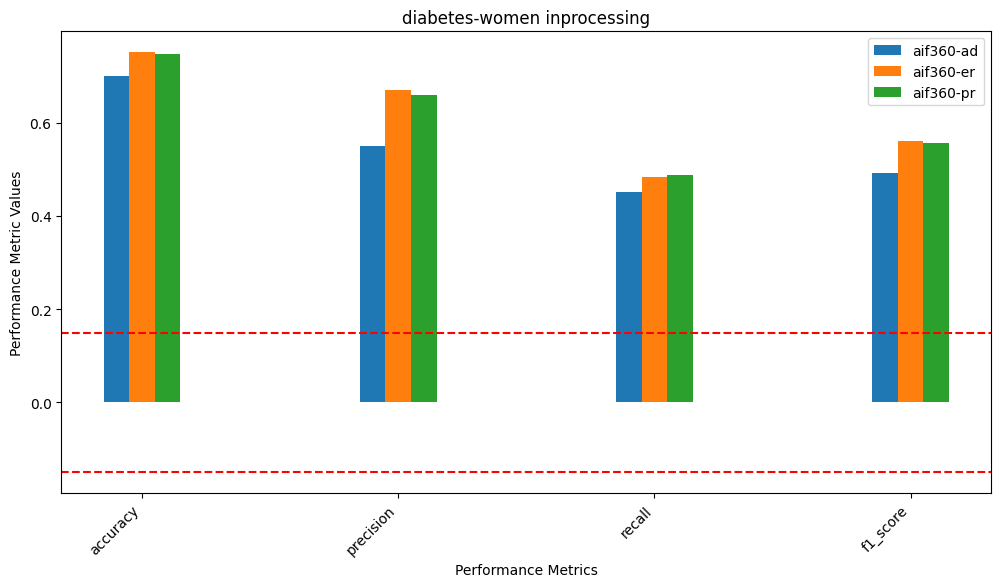

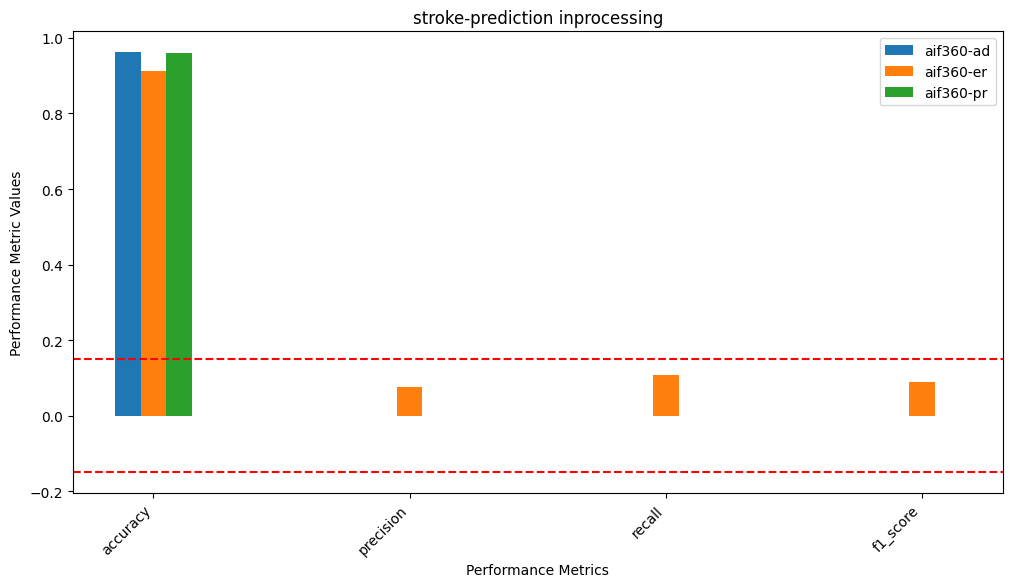

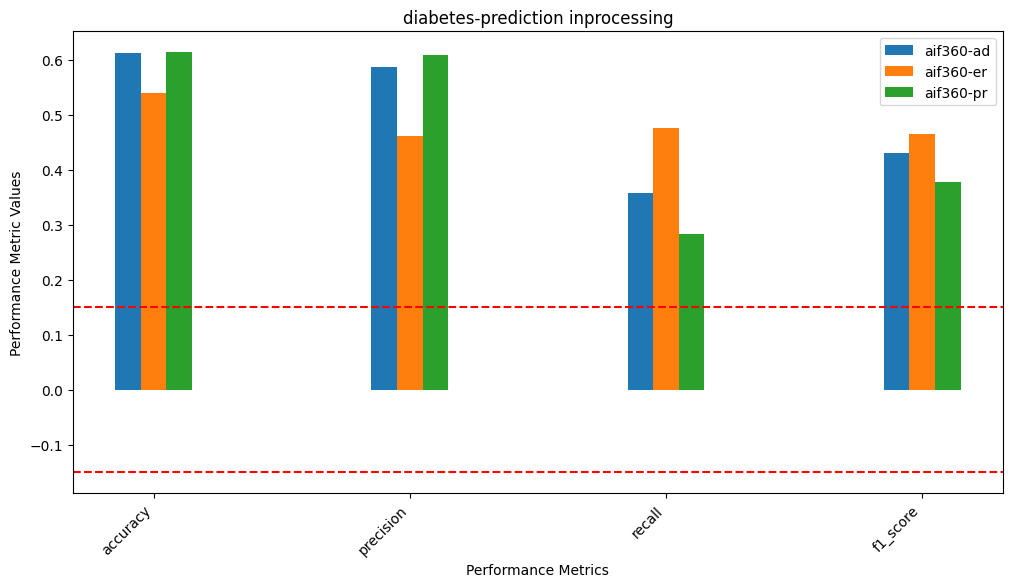

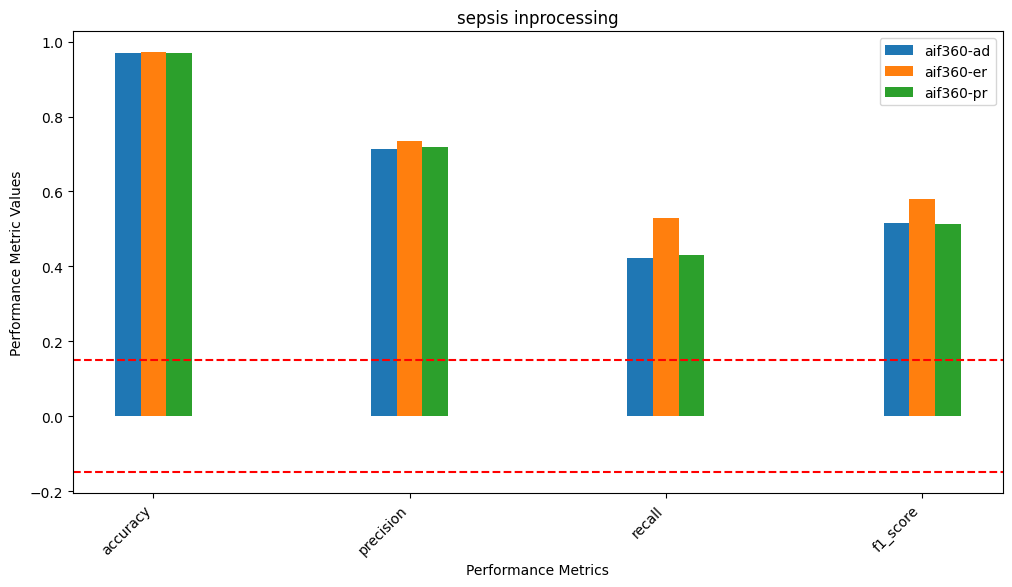

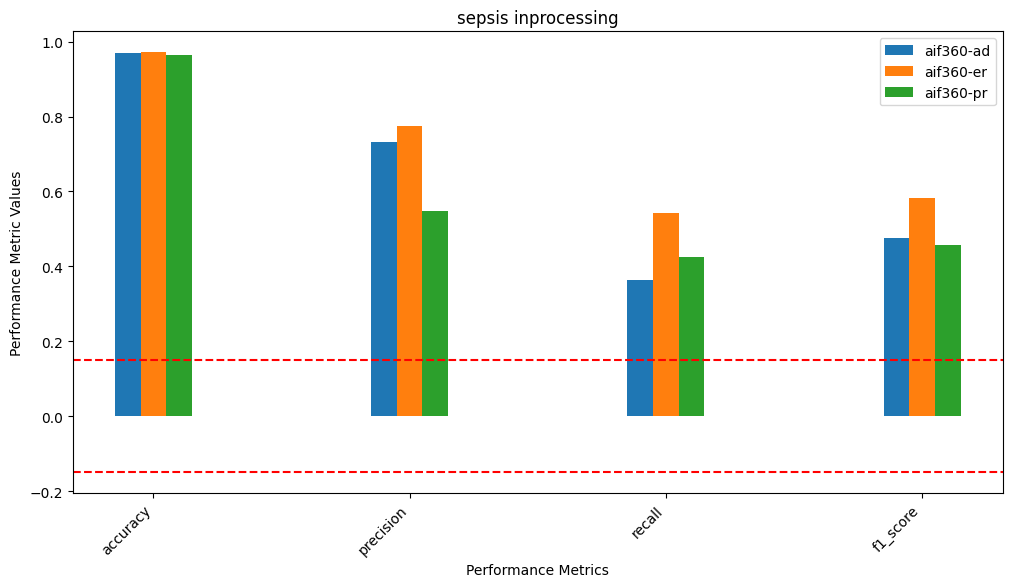

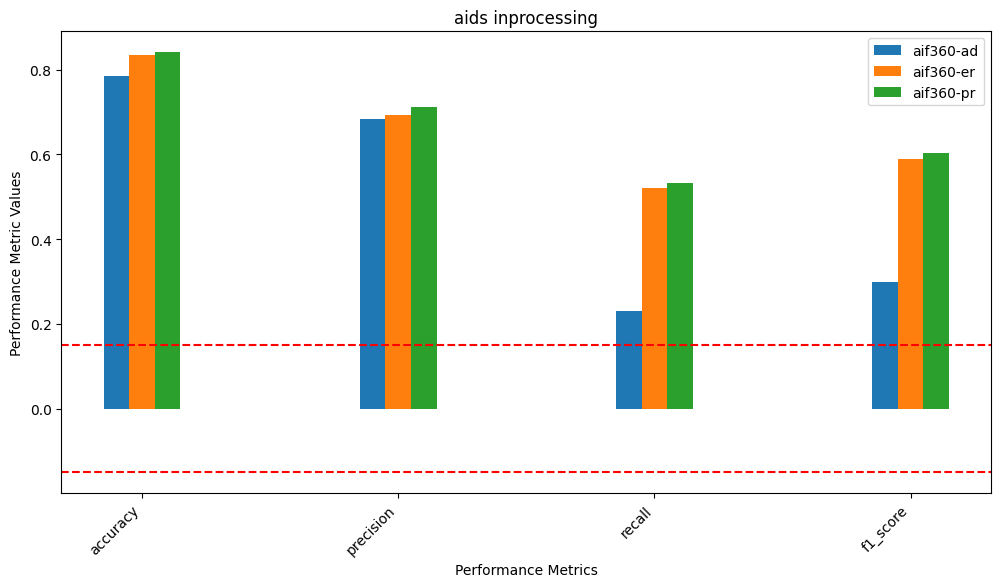

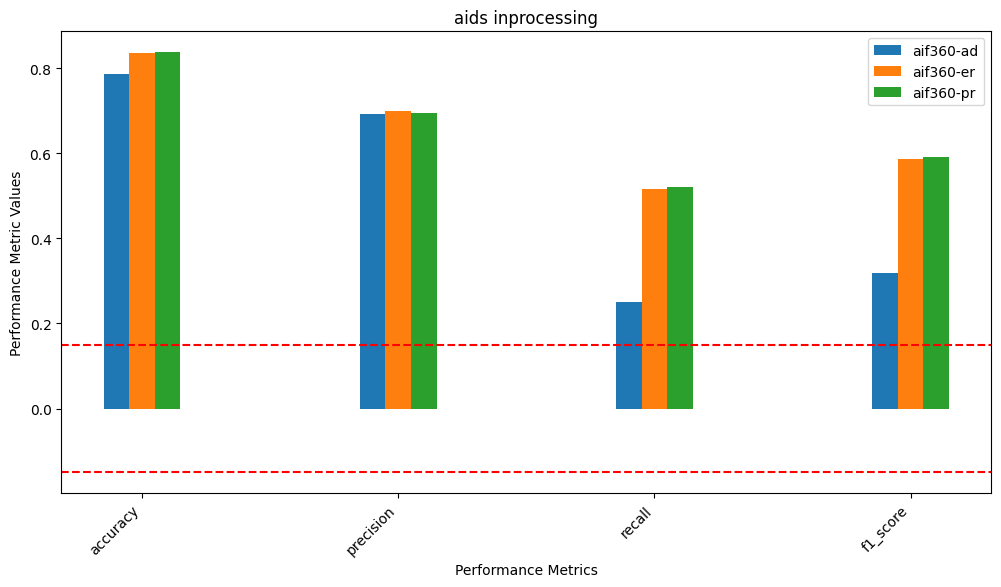

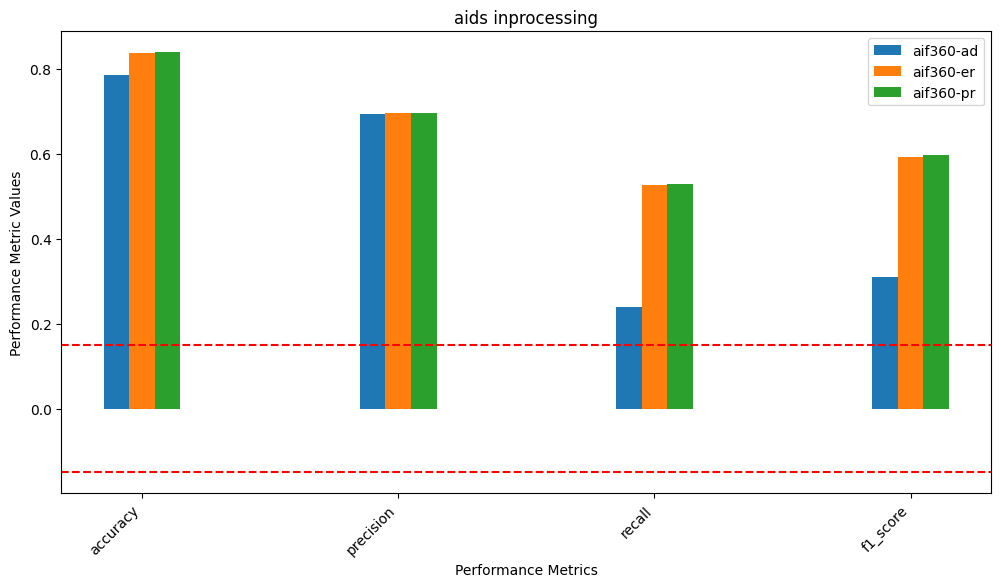

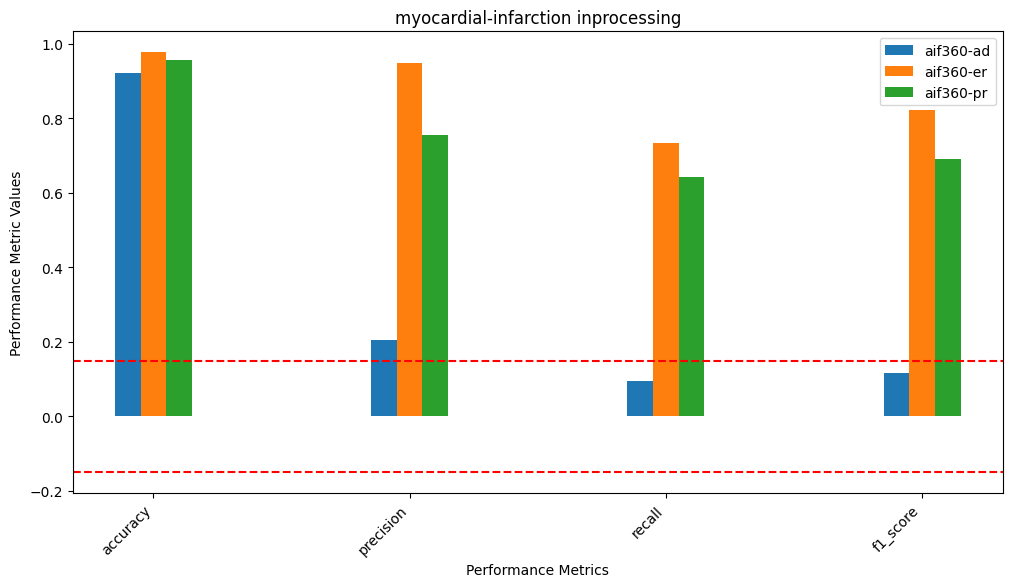

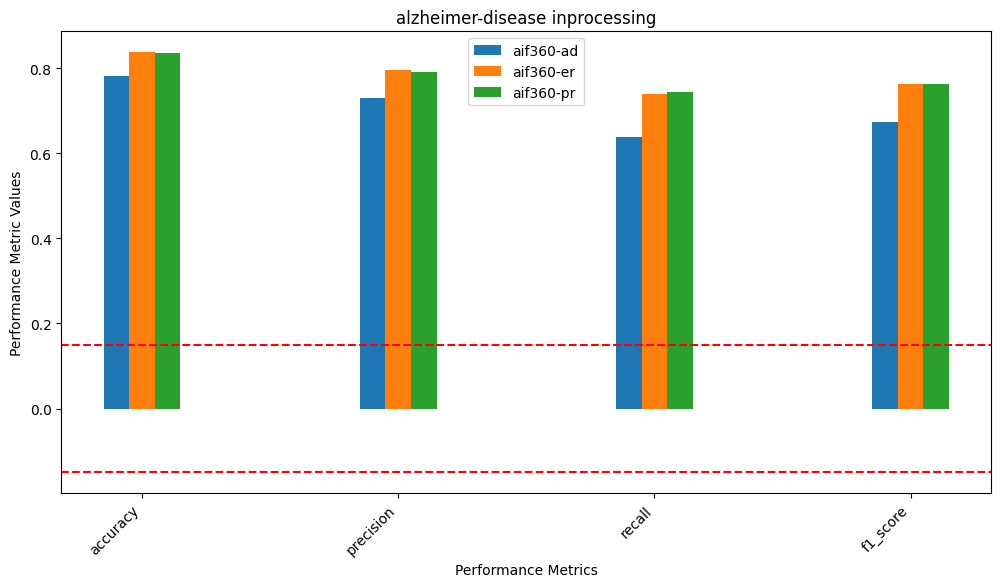

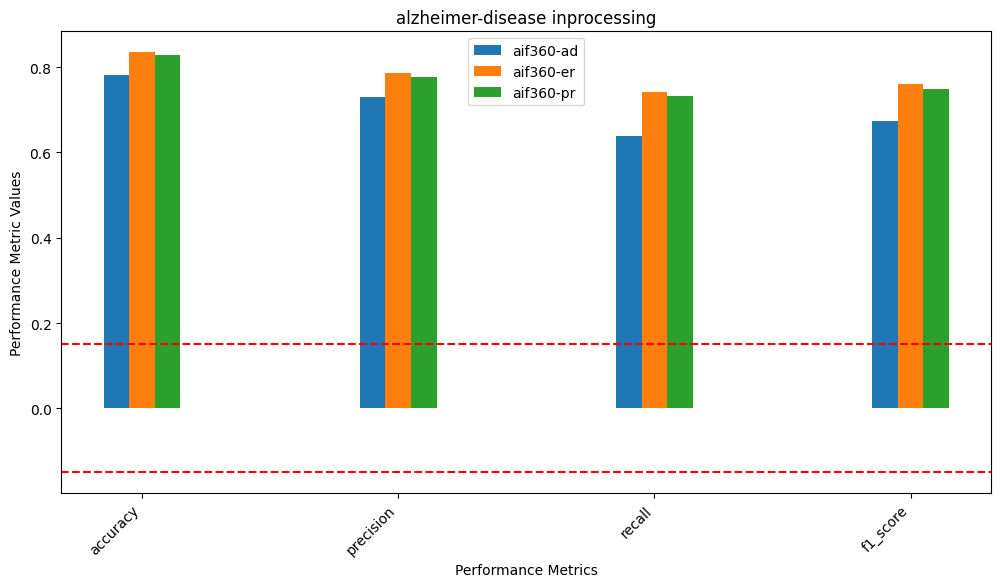

In [22]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    perf_grouped_bar_no_model(performance_metrics[dataset_name][sensible_attribute], ["aif360-ad", "aif360-er",'aif360-pr'], 'inprocessing', dataset_name, sensible_attribute)
    #'orig-Logistic Regression','orig-Bagging','orig-Random Forest', 'orig-Extremely Randomized Trees','orig-Decision Tree', 'orig-Ada Boost'

In [23]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', None, ["aif360-ad", "aif360-er",'aif360-pr'])

accuracy      precision         recall       f1_score
Mitigation                                                            
aif360-ad   0.701+/-0.015  0.550+/-0.096  0.452+/-0.088  0.492+/-0.077
aif360-er   0.751+/-0.033  0.671+/-0.067  0.484+/-0.039  0.560+/-0.032
aif360-pr   0.747+/-0.032  0.659+/-0.074  0.488+/-0.028  0.558+/-0.025

### all in-processing techniques, division, no ML models

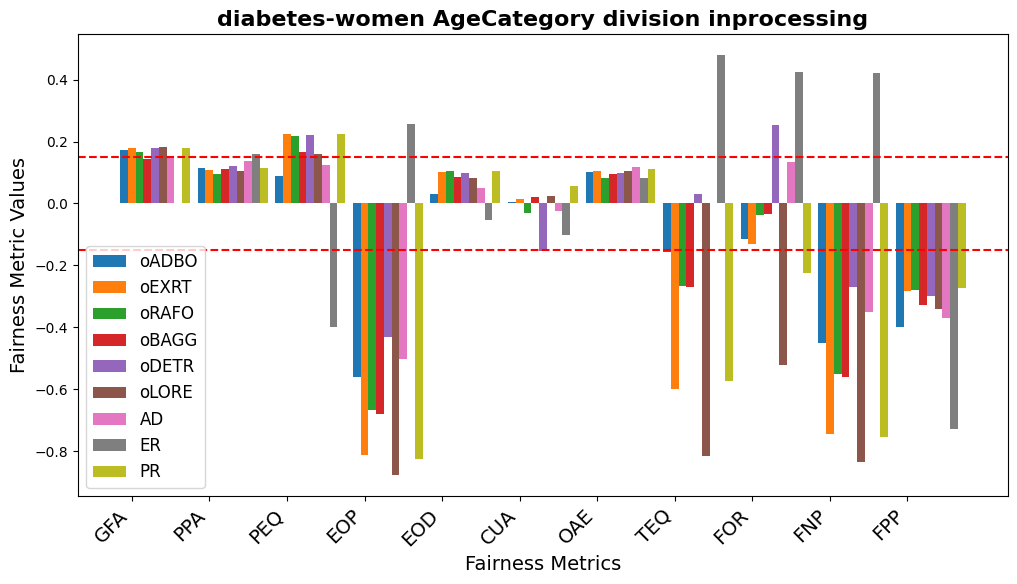

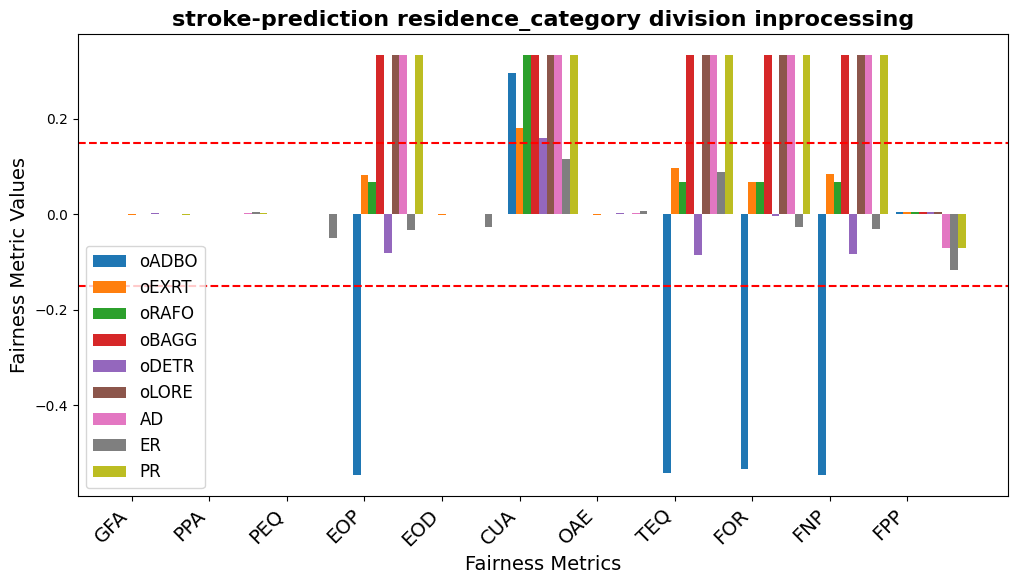

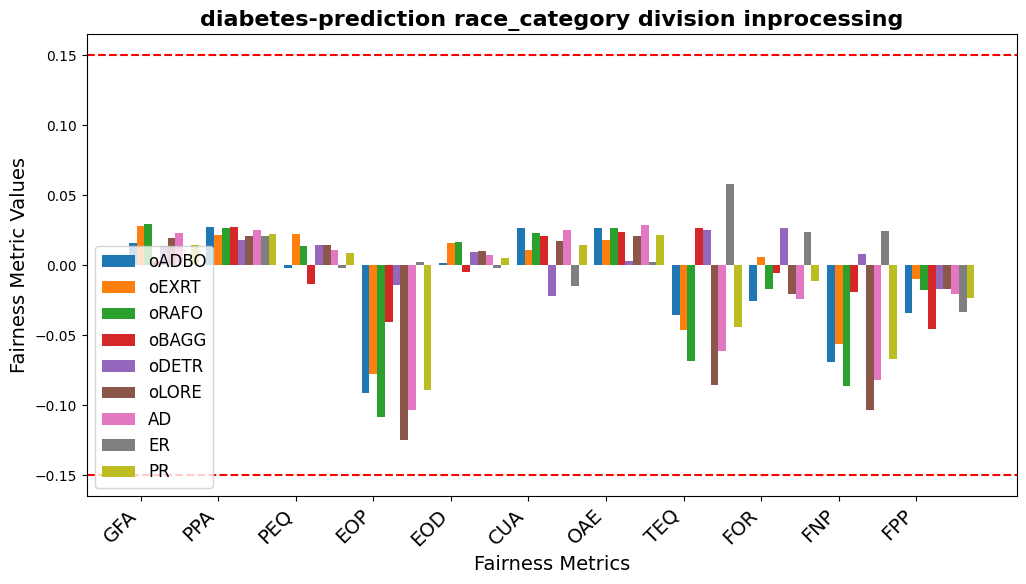

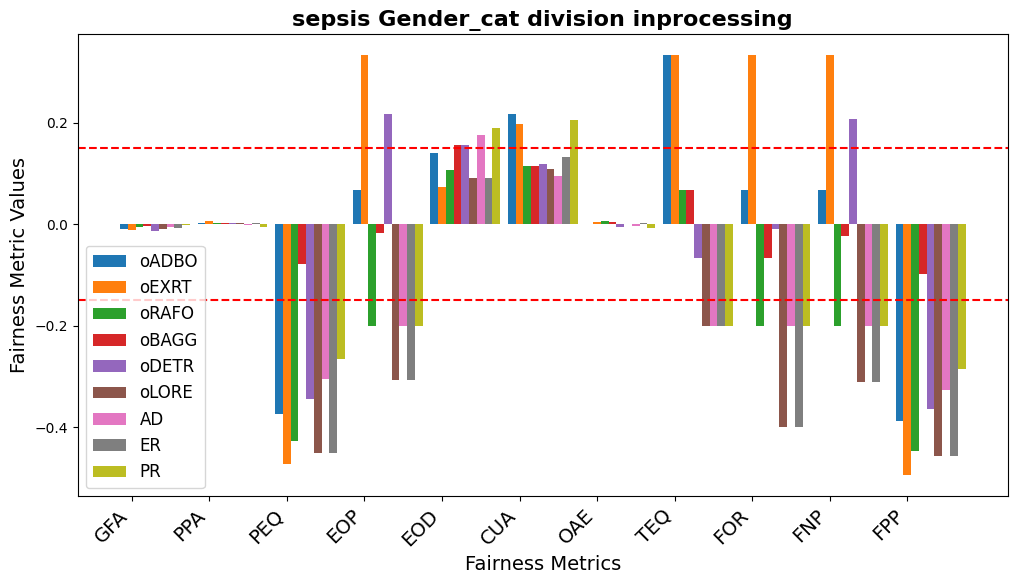

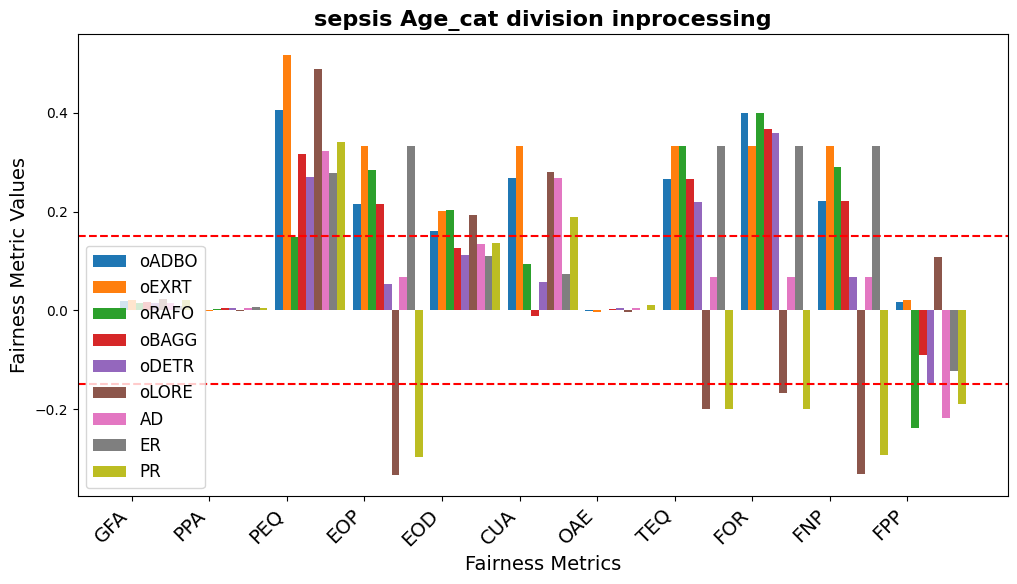

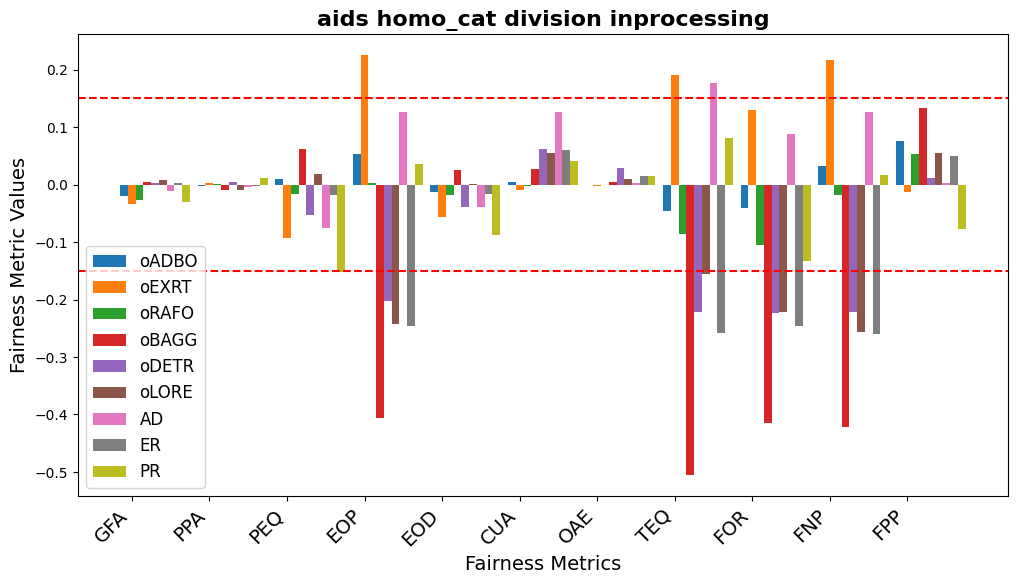

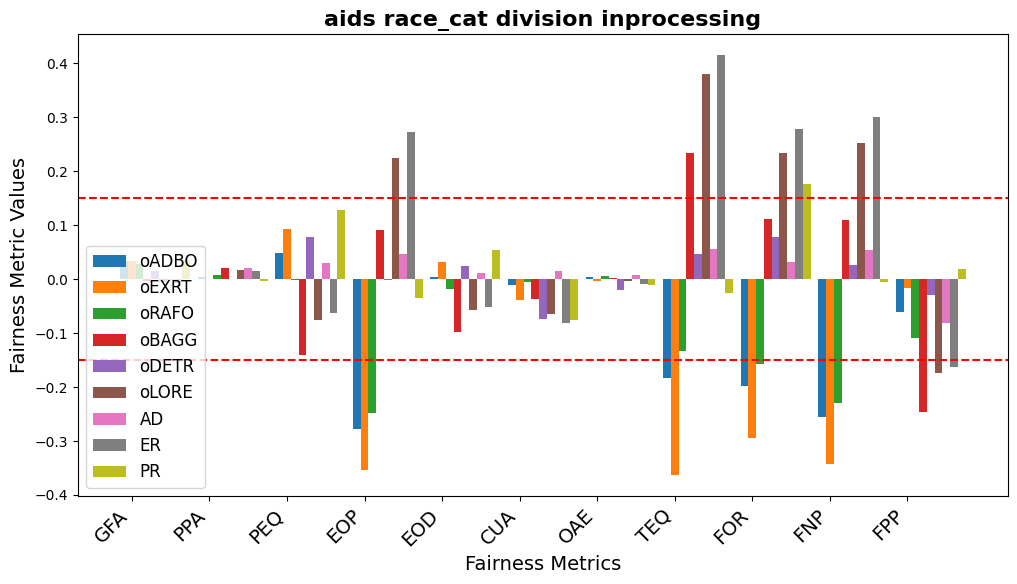

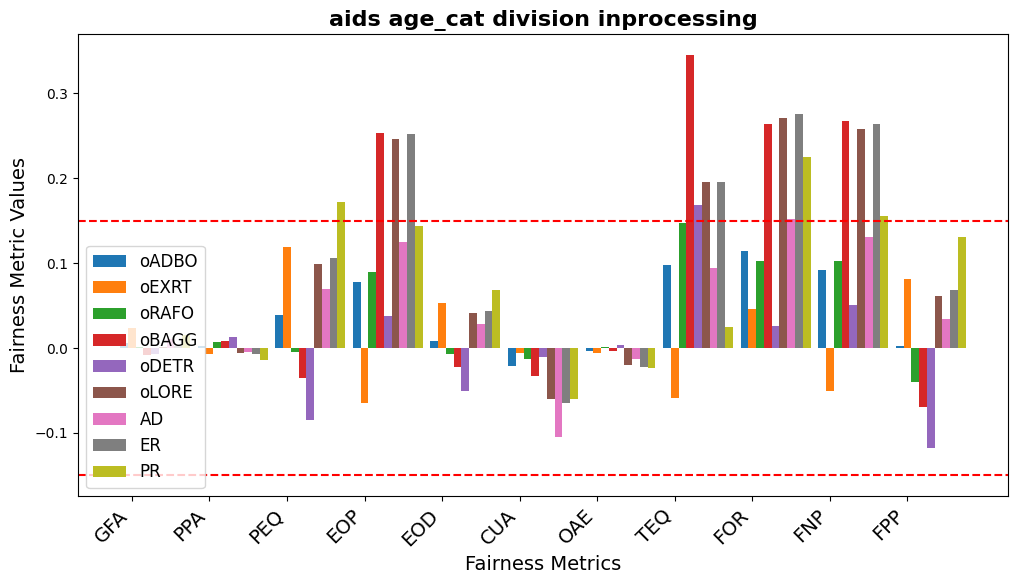

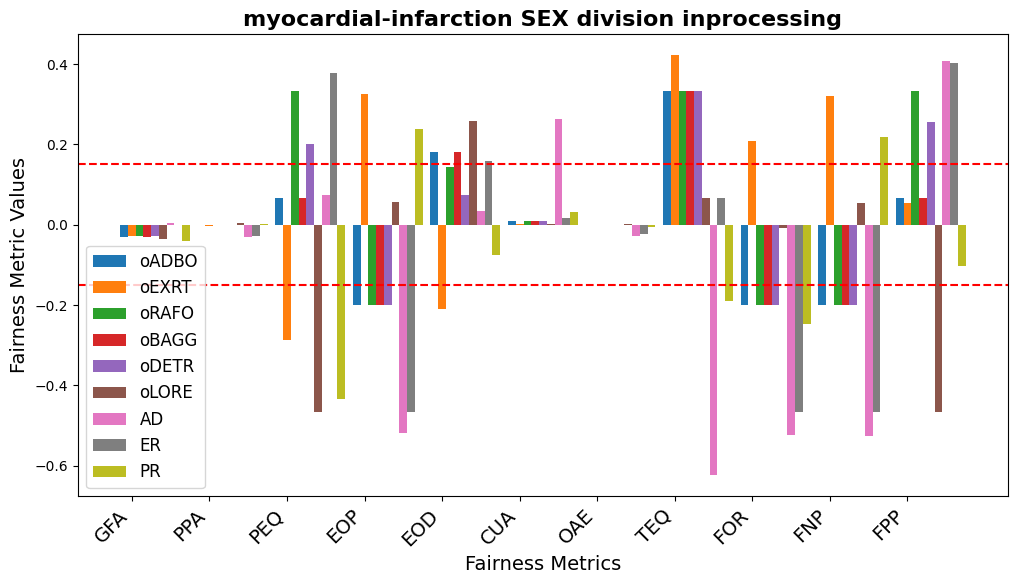

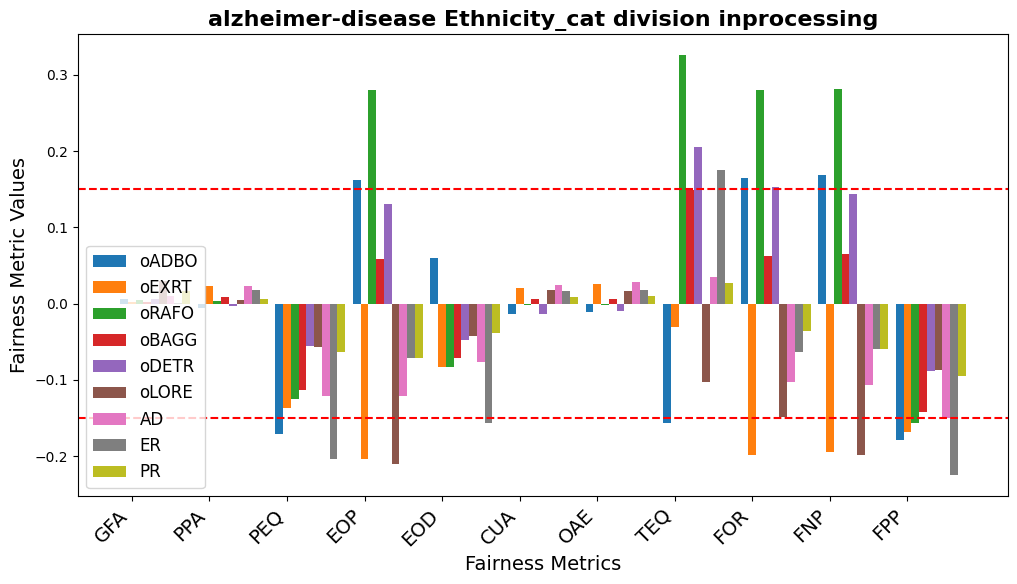

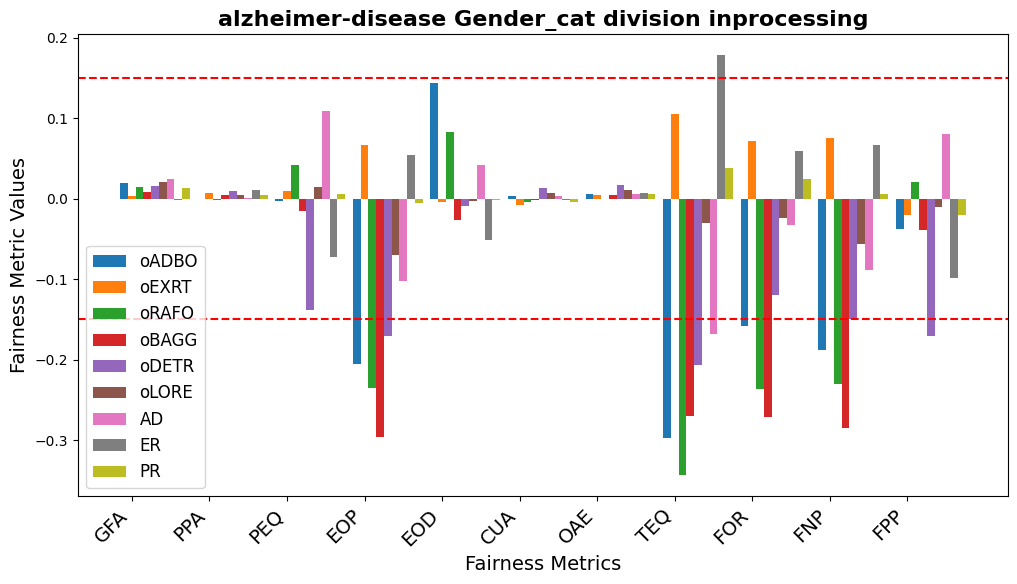

In [24]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "division", 'inprocessing', dataset_name, sensible_attribute)

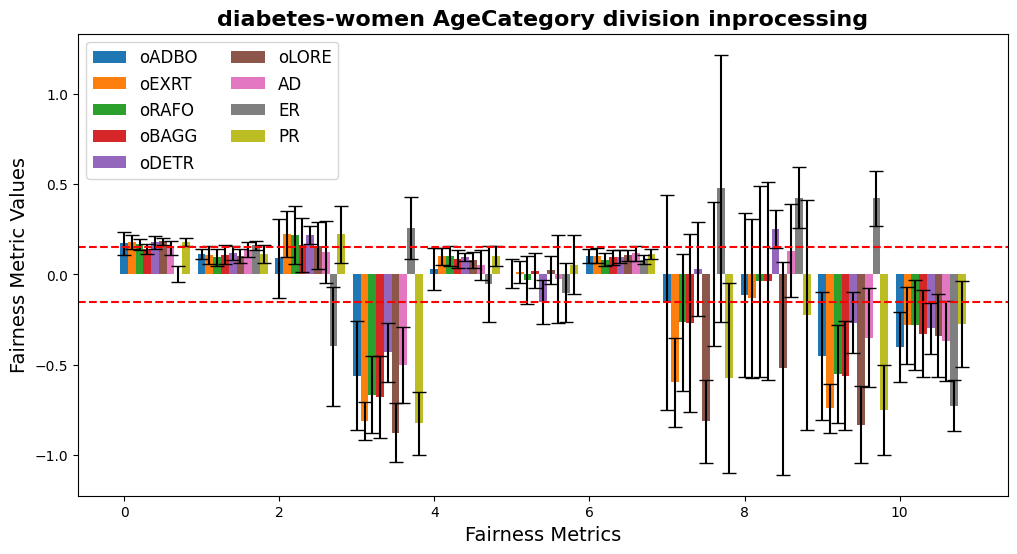

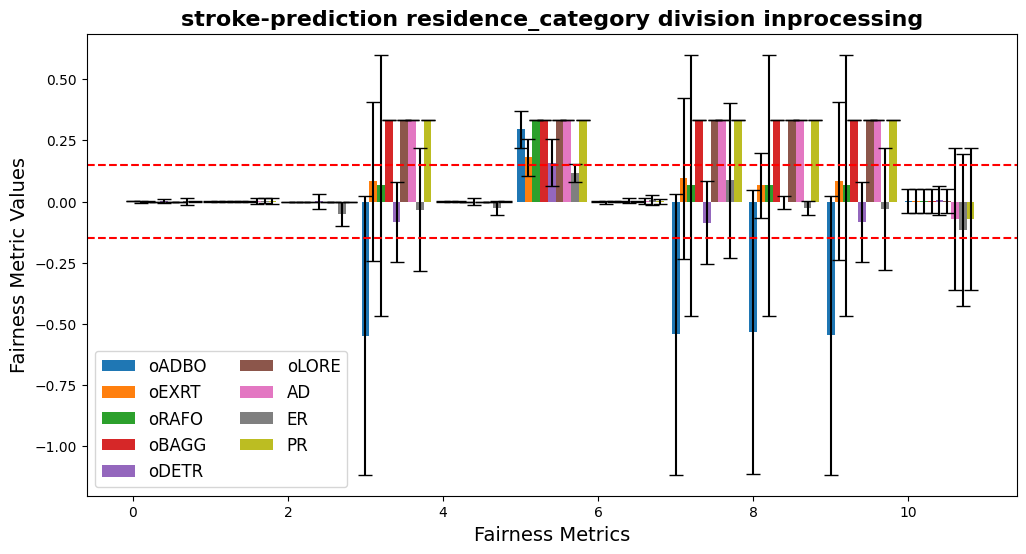

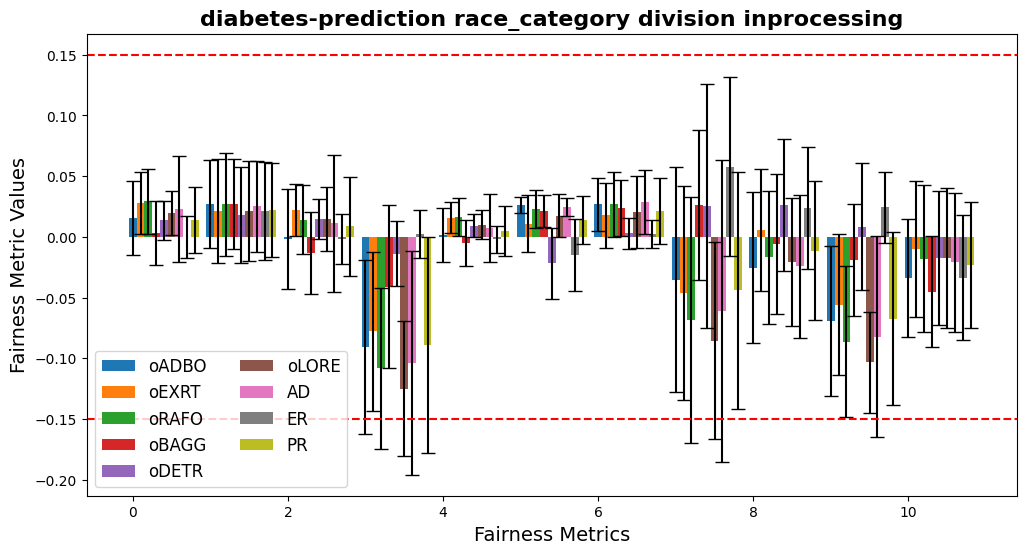

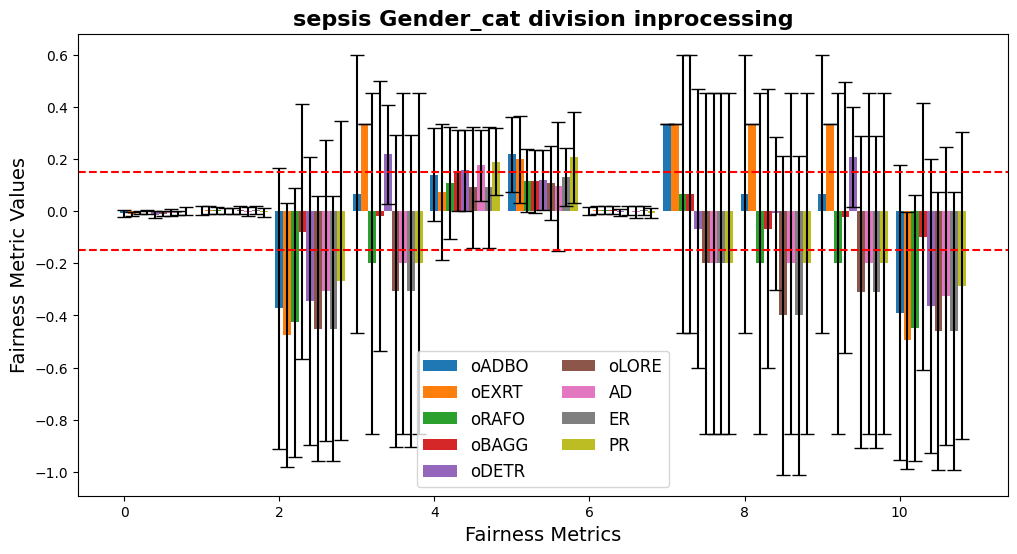

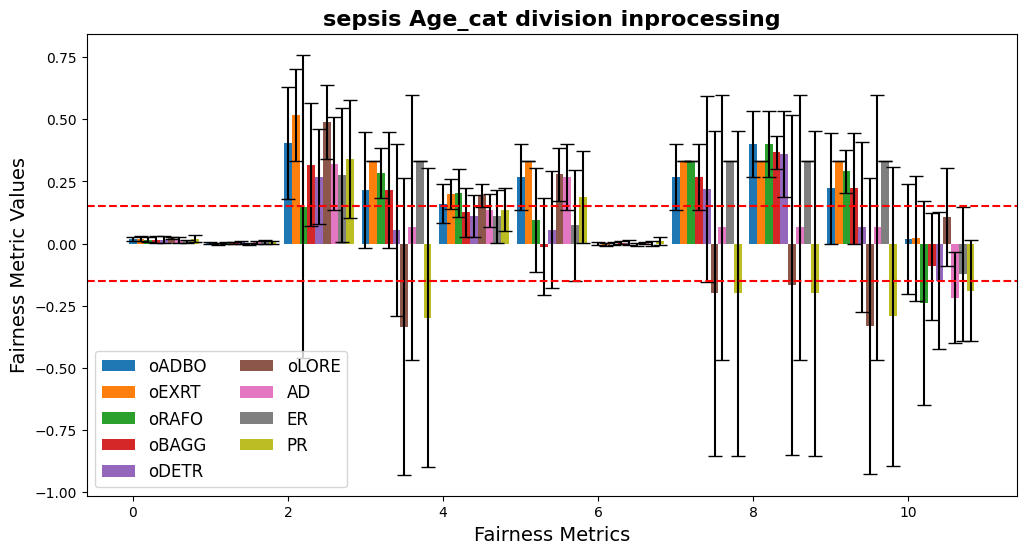

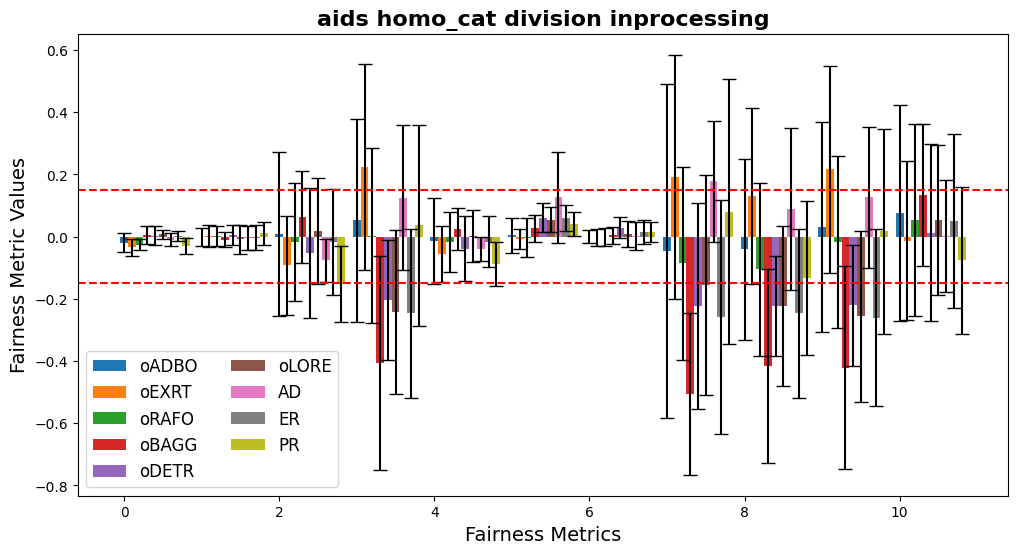

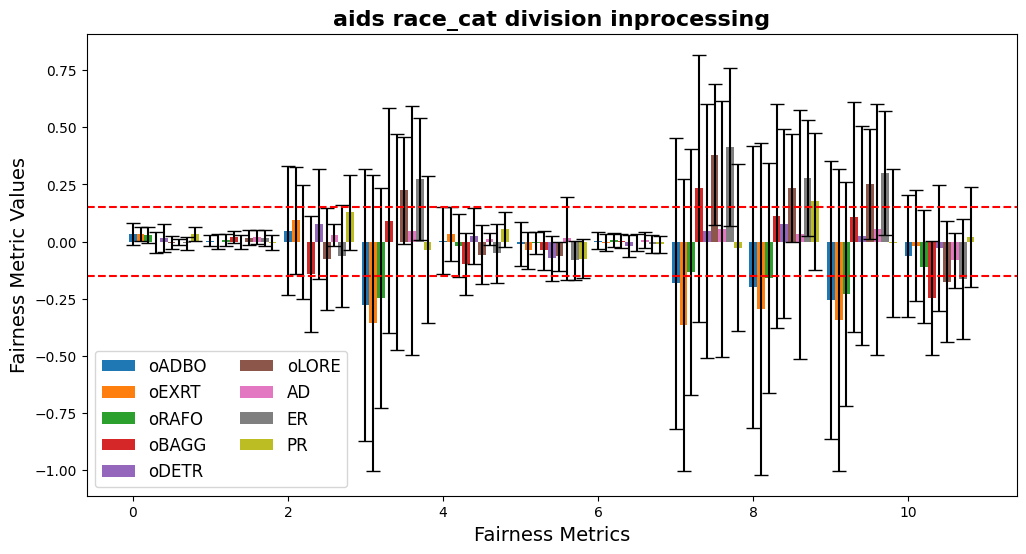

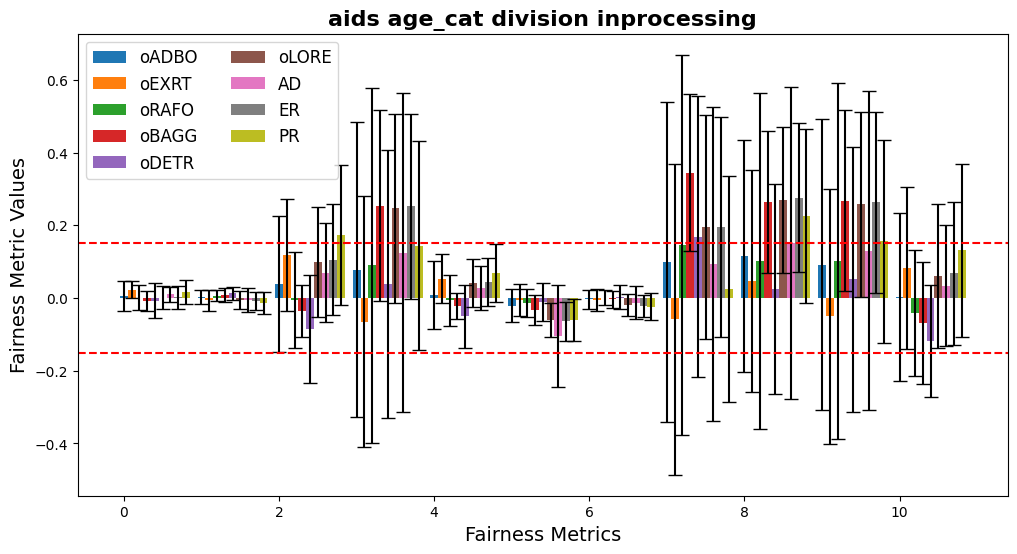

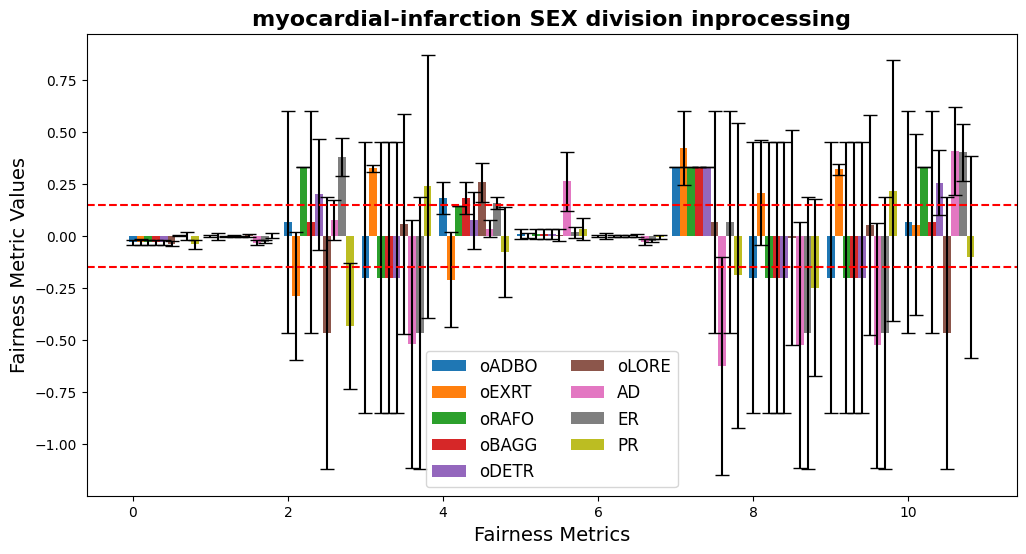

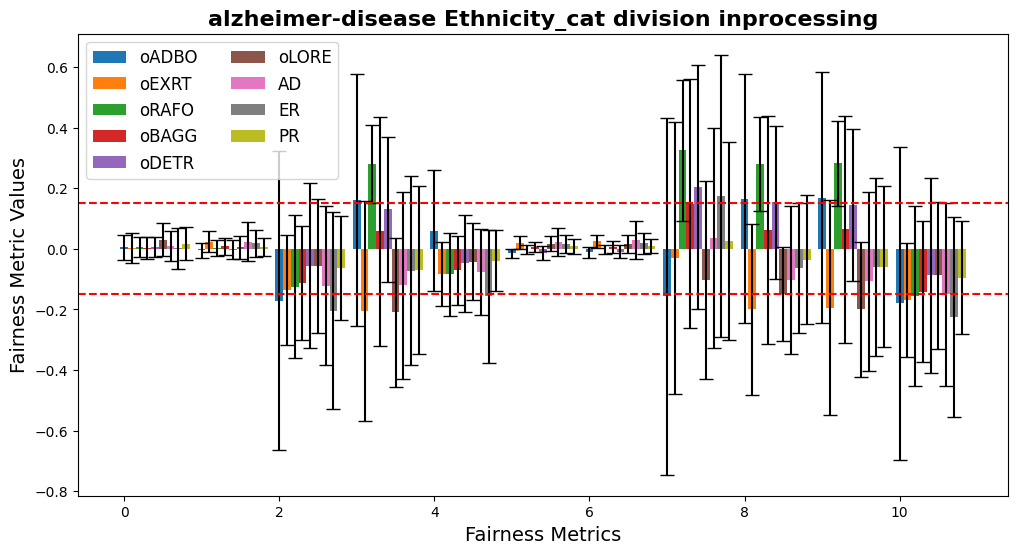

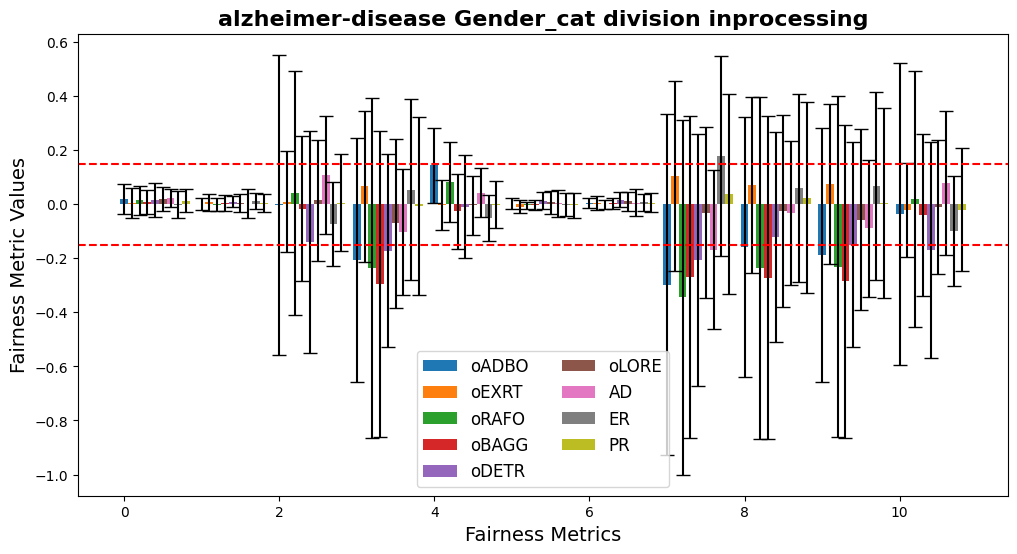

In [25]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model_std_dev(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "division", 'inprocessing', dataset_name, sensible_attribute)

### all three in-processing techniques, subtraction, no ML models

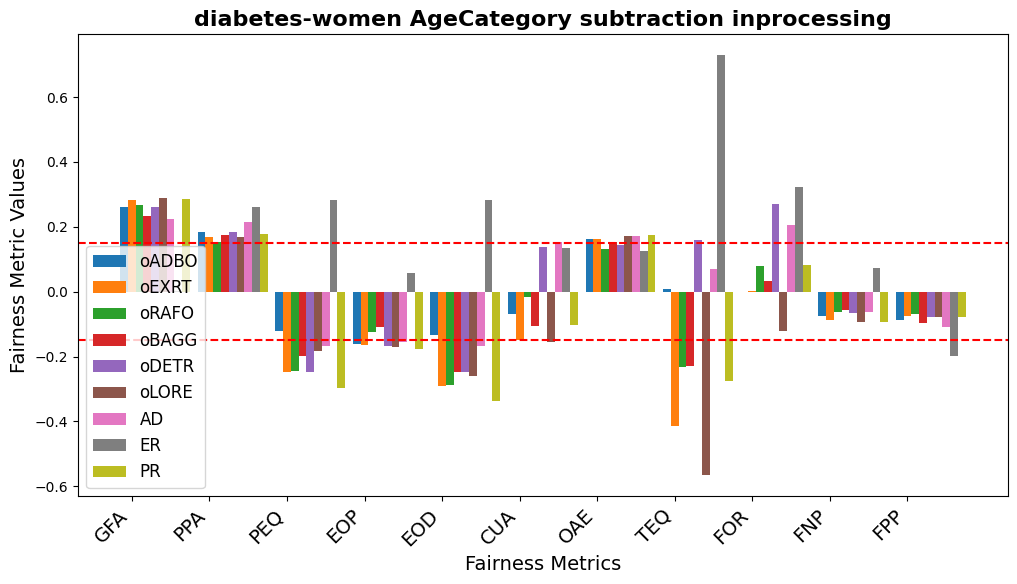

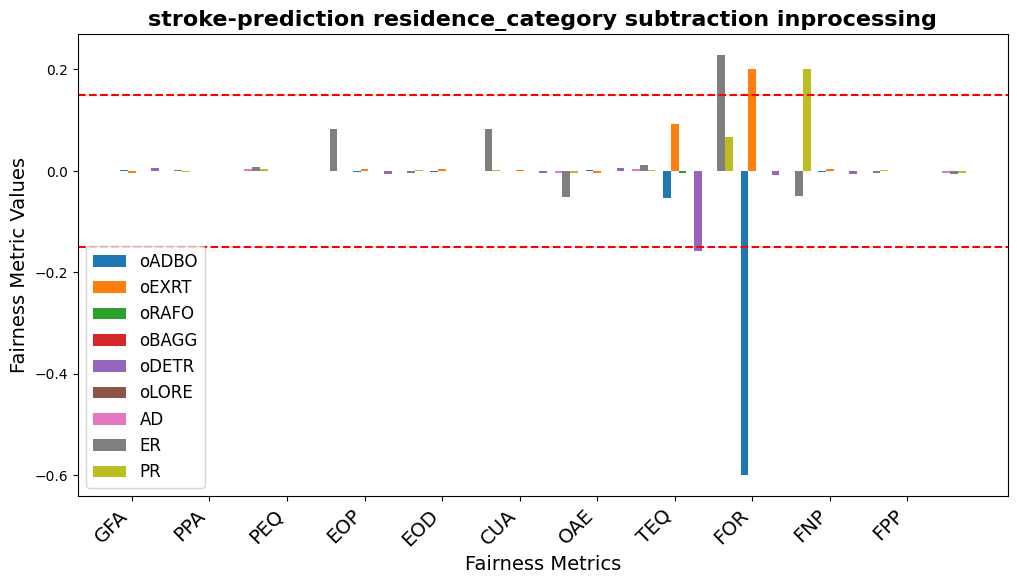

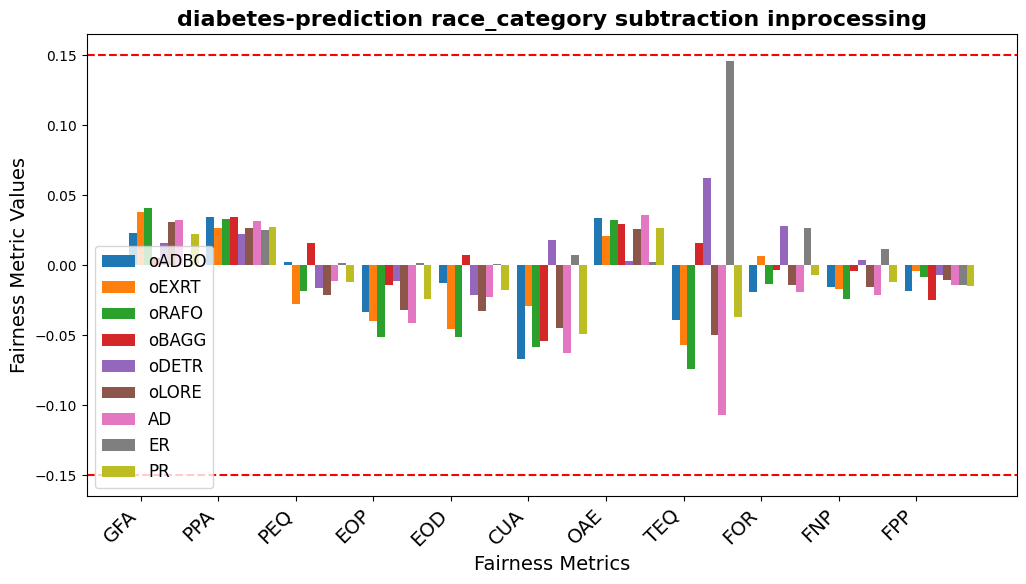

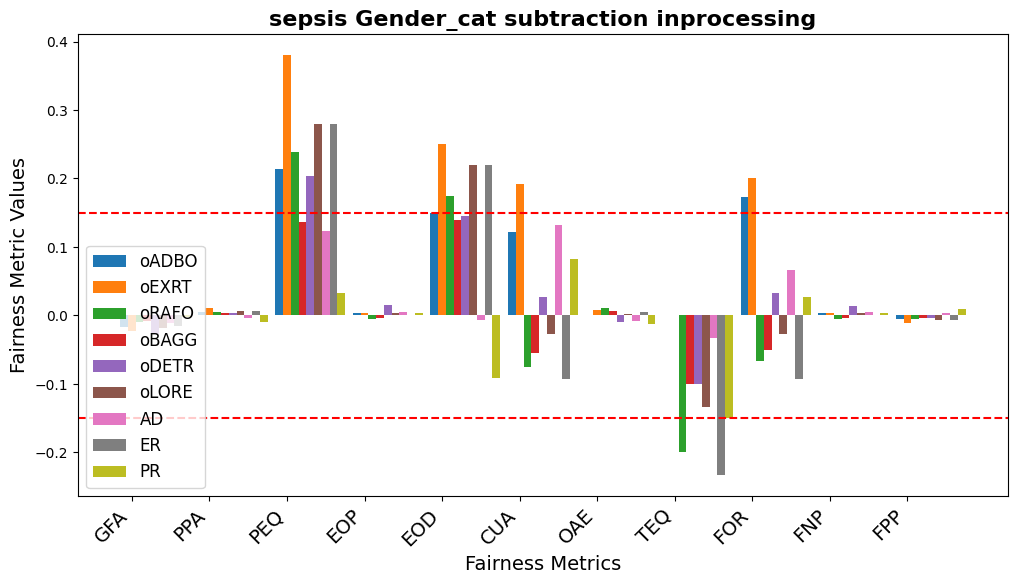

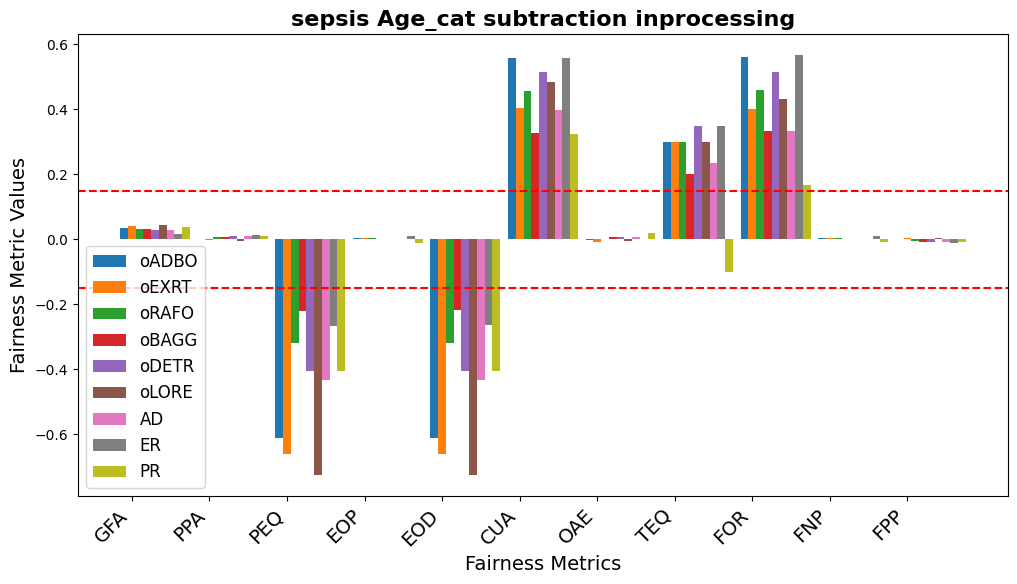

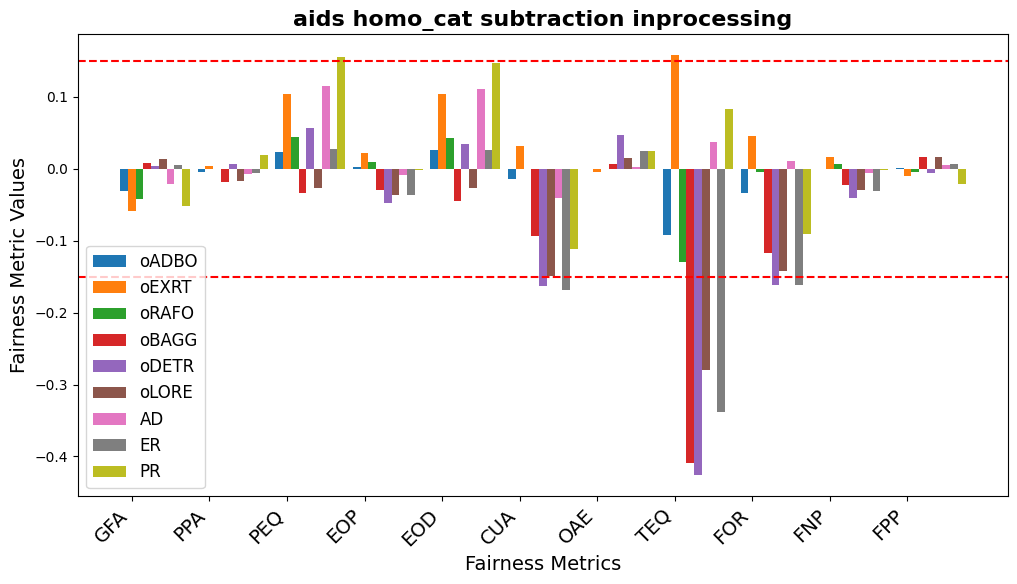

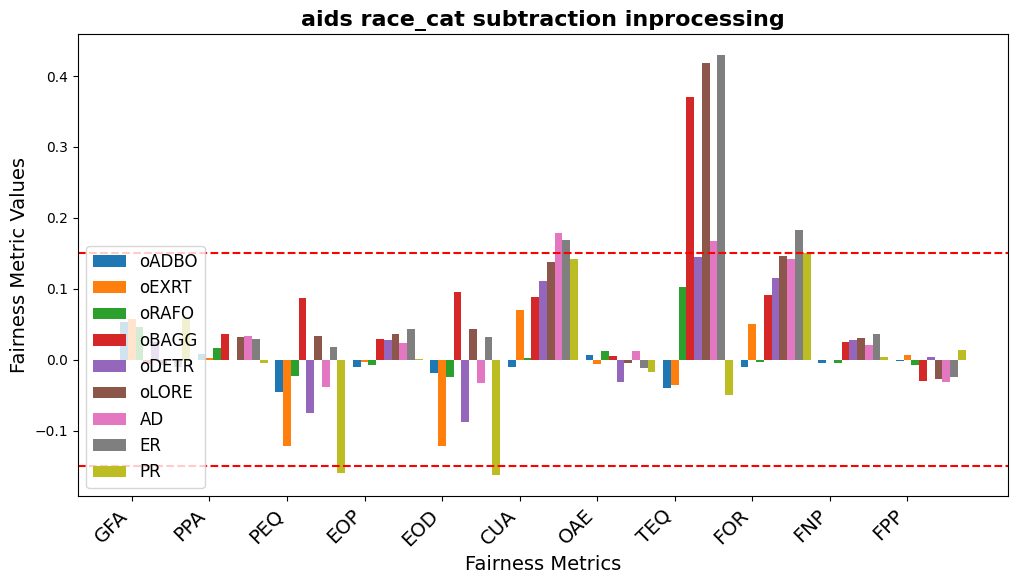

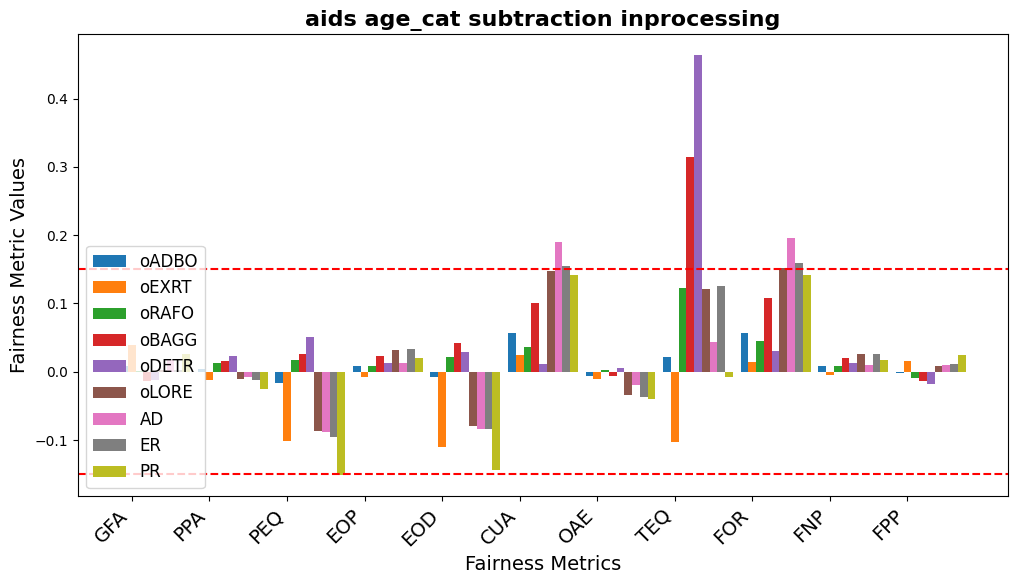

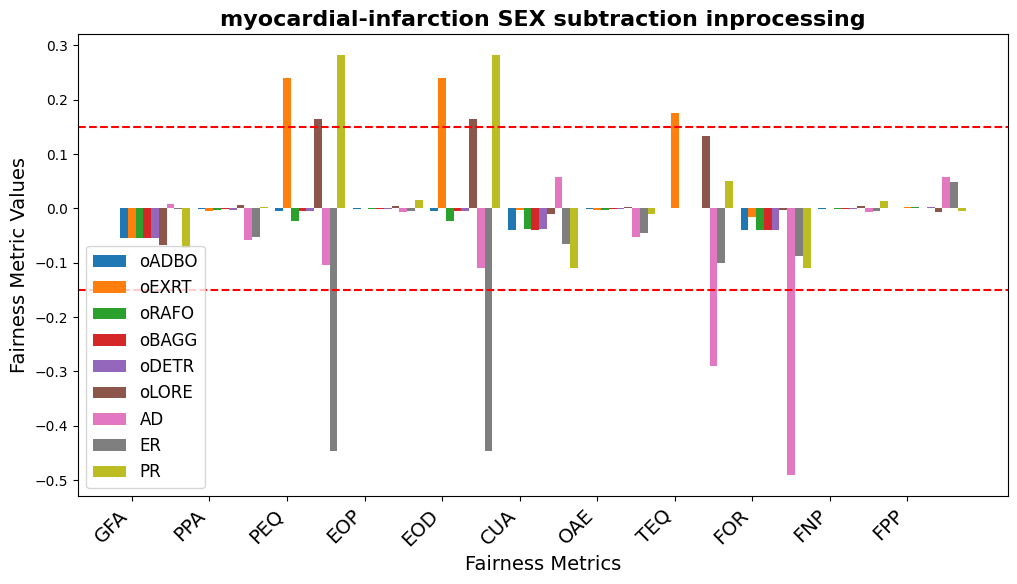

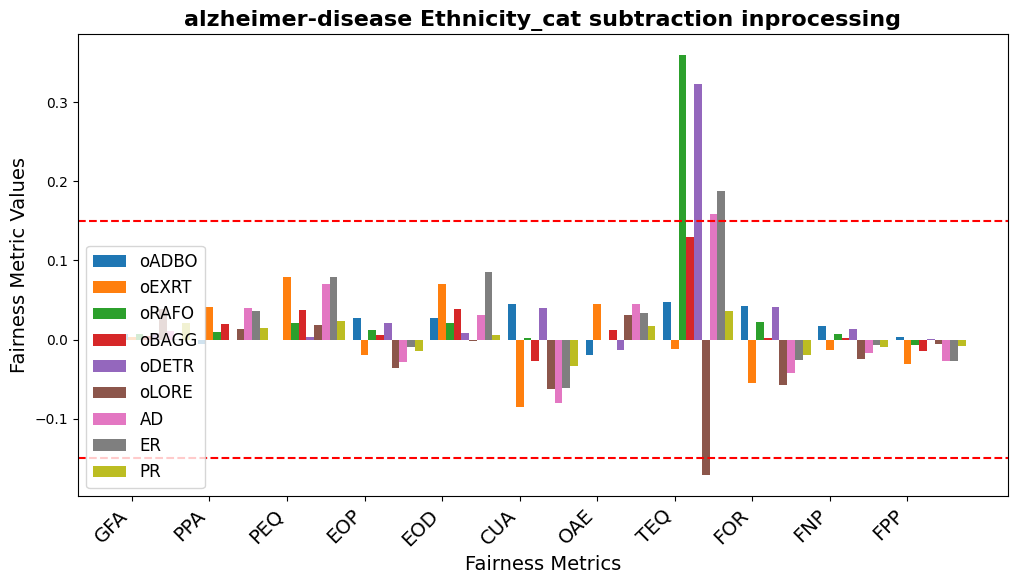

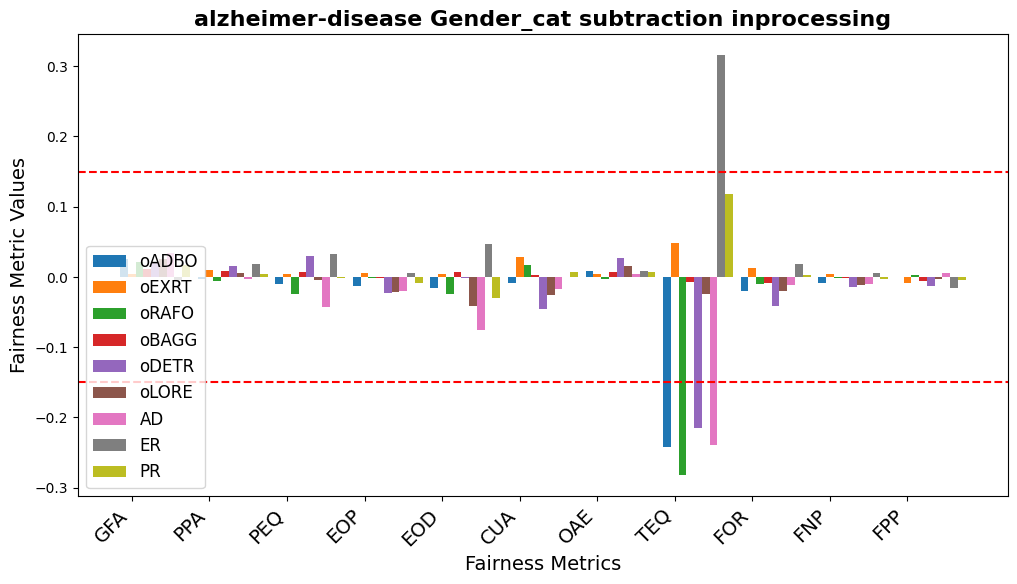

In [26]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "subtraction", 'inprocessing', dataset_name, sensible_attribute)

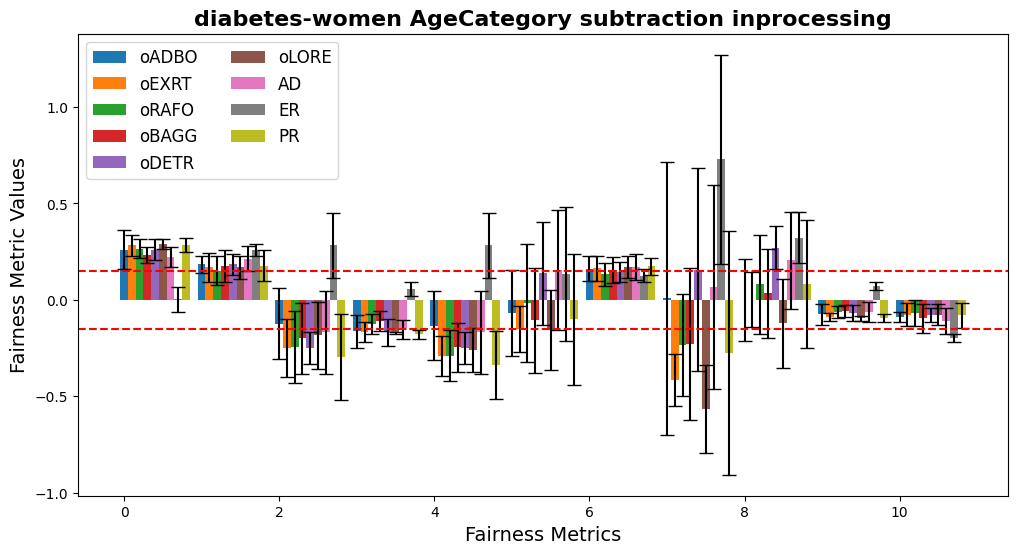

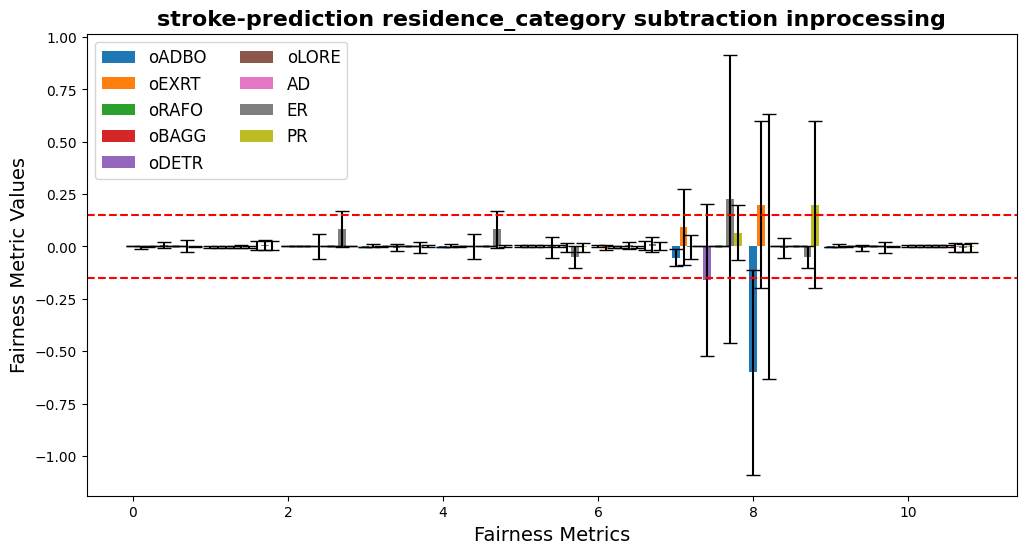

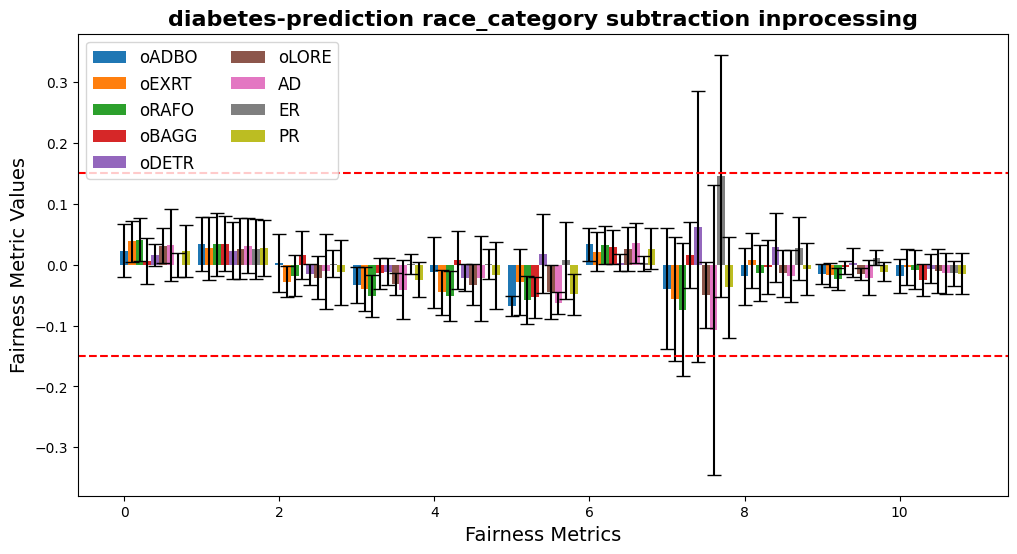

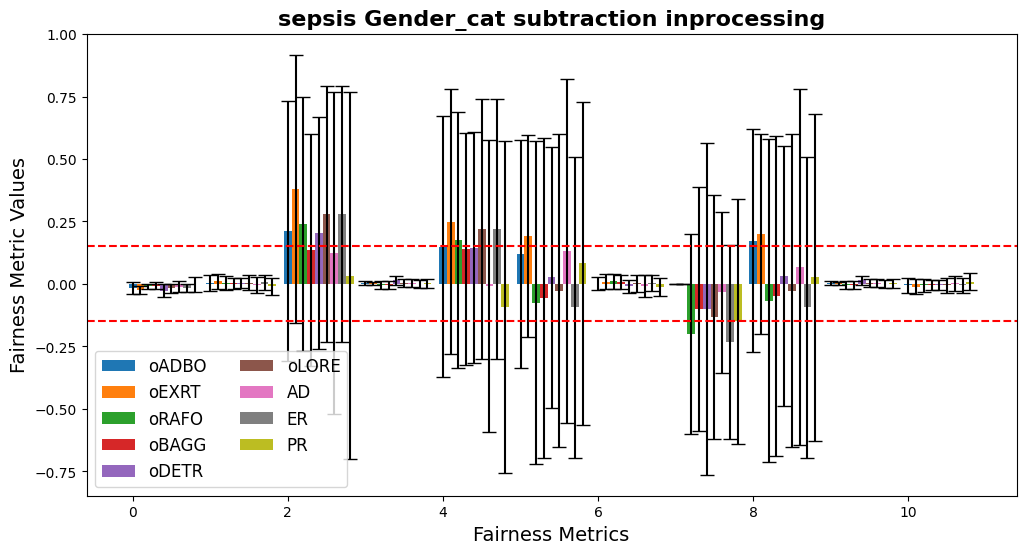

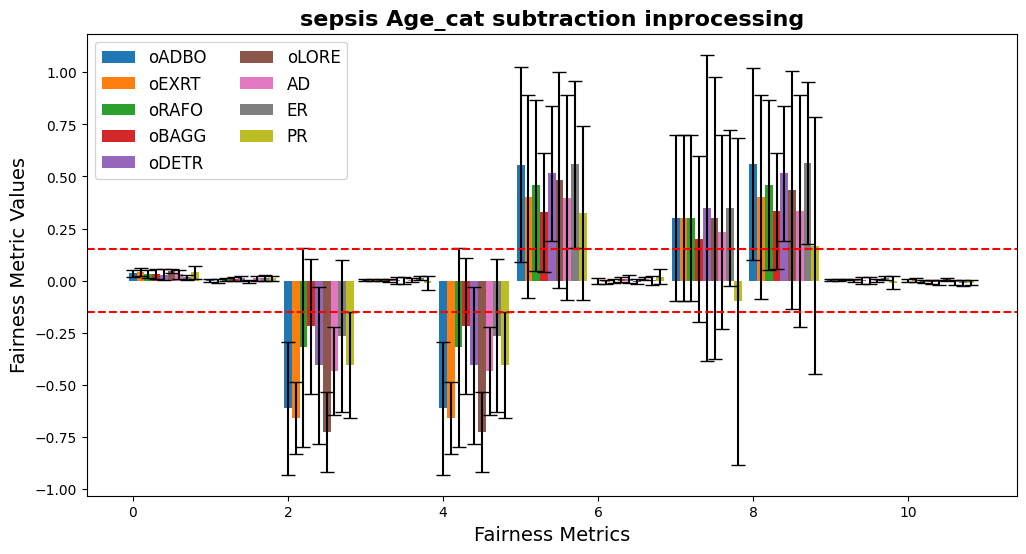

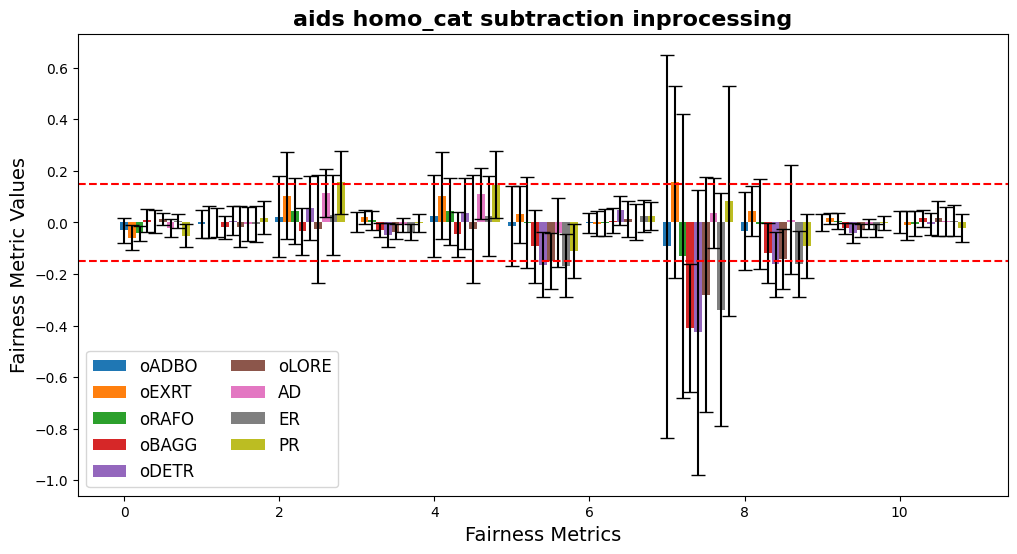

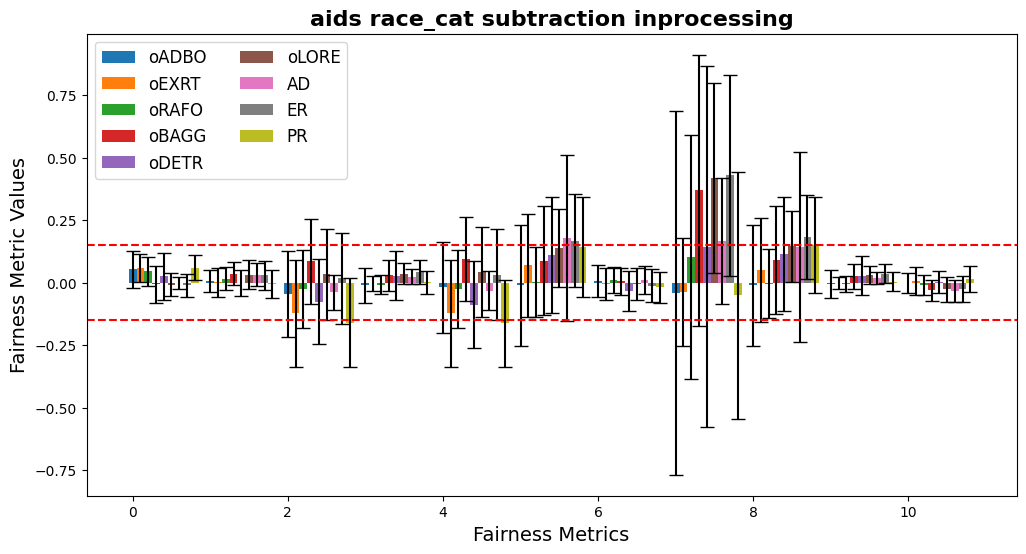

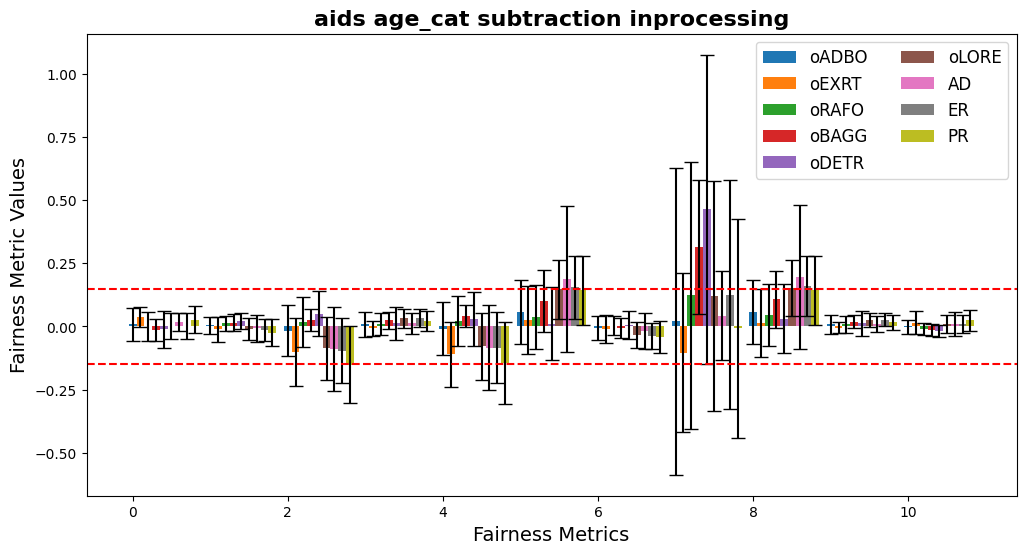

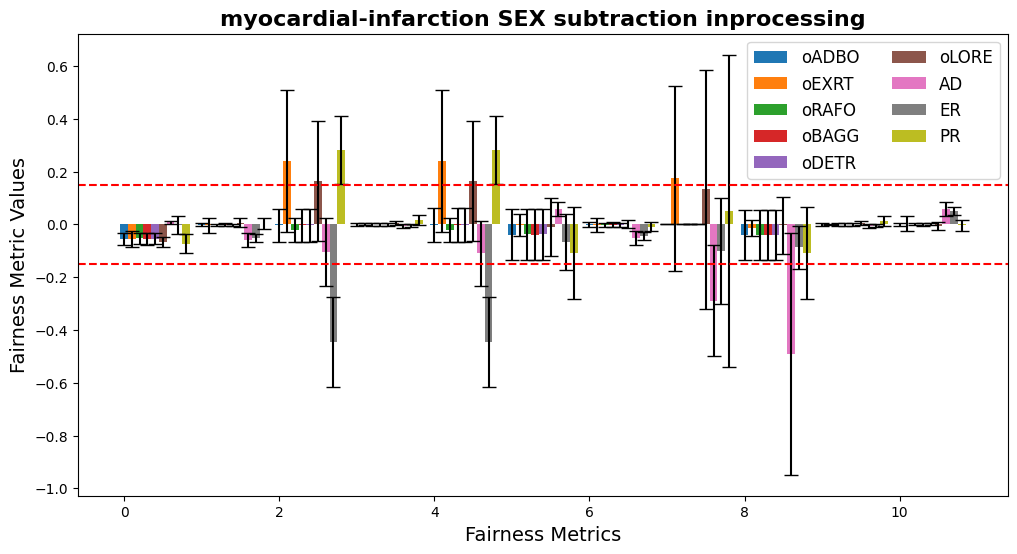

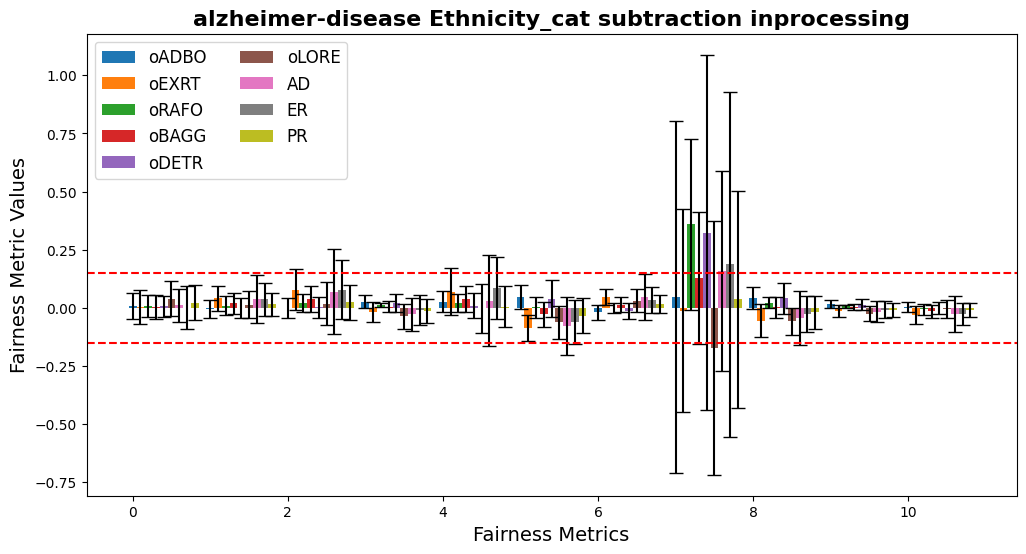

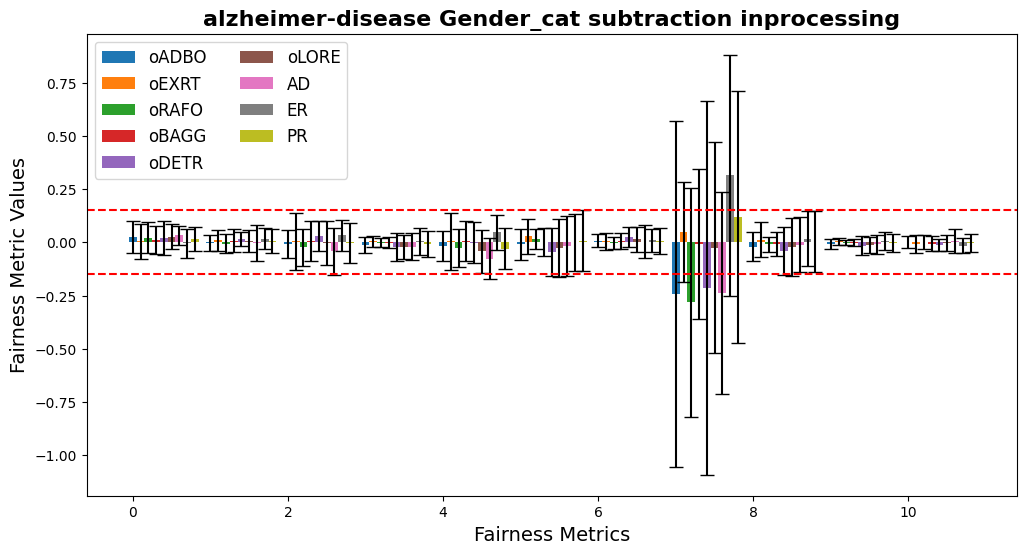

In [27]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model_std_dev(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "subtraction", 'inprocessing', dataset_name, sensible_attribute)

# Post-processing results

In [28]:
print(postprocessing_mitigation_list)

['original', 'aif360-roc', 'aif360-ce', 'fl-to', 'aif360-eo']


In [7]:
postprocessing_mitigation_list.insert(0,'original')

### Performance

In [29]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      perf_grouped_bar(performance_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Logistic Regression", postprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.778+/-0.044  0.711+/-0.037  0.559+/-0.054  0.624+/-0.034
aif360-roc  0.738+/-0.074  0.727+/-0.163  0.357+/-0.267  0.405+/-0.281
aif360-ce   0.766+/-0.031  0.701+/-0.046  0.503+/-0.018  0.585+/-0.020
fl-to       0.704+/-0.035  0.651+/-0.133  0.416+/-0.241  0.430+/-0.180
aif360-eo   0.729+/-0.049  0.642+/-0.060  0.446+/-0.182  0.496+/-0.135

In [31]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Bagging", postprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.772+/-0.046  0.747+/-0.070  0.485+/-0.064  0.583+/-0.039
aif360-roc  0.766+/-0.045  0.745+/-0.040  0.453+/-0.061  0.560+/-0.044
aif360-ce   0.760+/-0.037  0.781+/-0.079  0.388+/-0.053  0.514+/-0.039
fl-to       0.699+/-0.036  0.555+/-0.057  0.458+/-0.041  0.498+/-0.029
aif360-eo   0.723+/-0.047  0.719+/-0.109  0.342+/-0.164  0.424+/-0.127

### all post-processing techniques, division, ML models

In [32]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "division", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "division", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

### all post-processing techniques, subtraction, all ML models

In [34]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "subtraction", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "subtraction", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

# Extra


## PCA alternative plot, with baseline evidenced.

In [ ]:
# Load the data
data = data_framing(overall_metrics, 'diabetes-women', "division", "Logistic Regression")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Select a baseline
baseline_algorithm = 'original'
baseline_index = data.index.get_loc(baseline_algorithm)

# Create a scatter plot
plt.figure(figsize=(10, 6))

for i, algorithm in enumerate(data.index):
    if algorithm == baseline_algorithm:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:red', label=algorithm)
    else:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:blue', label=algorithm)

# Annotate points with names
for i, algorithm in enumerate(data.index):
    plt.annotate(algorithm, (principal_components[i, 0], principal_components[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Algorithm Performance with Baseline')

# Add legend
plt.legend()

# TO DO: Distances should be calculated before the PCA
for i, algorithm in enumerate(data.index):
    if algorithm != baseline_algorithm:
        distance = euclidean(principal_components[i], principal_components[baseline_index])
        print(f"Distance between {algorithm} and {baseline_algorithm}: {distance}")

plt.show()

T-SNE experiment alternative to PCA.

In [ ]:
tsne = TSNE(n_components=2, perplexity=3)
X_r = tsne.fit_transform(vectorise(overall_metrics, 'diabetes-women', "division", "Logistic Regression"))

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']#,'tab:cyan']
ax.scatter(X_r[:, 0], X_r[:, 1], color=colors)
for i, label in enumerate(mitigation_list):
    plt.annotate(label, (X_r[:, 0][i], X_r[:, 1][i]))
plt.show()

## Heatmaps

In [ ]:
# Aggregation of metrics
def aggregate_all(metrics_dictionary, dataset, mitigation, comparison, model):
  l = []
  for metric in metrics:
    l.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
  return np.mean(l), np.std(l)

In [ ]:
# TO DO questo richiede chiaramente che le misure vengano in qualche modo normalizzate o stiano tutte entro lo stesso intervallo e con significati quantitativi simili -> DIFFICILE
aggregate_all(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

In [ ]:
# Aggregation of metrics by family
def fine_aggregation(metrics_dictionary, dataset, mitigation, comparison, model):
  groups = {'metrics_on_results': ['GroupFairness'],
            'metrics_on_FP': ['PredictiveParity', 'PredictiveEquality', 'FP'],
            'metrics_on_FN': ['EqualOpportunity', 'FORParity', 'FN'],
            'metrics_on_all': ['TreatmentEquality', 'EqualizedOdds', 'ConditionalUseAccuracyEquality', 'OverallAccuracyEquality']
            }

  aggregated_metrics = {}
  for k in groups.keys():
    support = []
    for metric in groups[k]:
      support.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
    aggregated_metrics[k] = np.array([np.mean(support), np.std(support)])

  return aggregated_metrics

In [ ]:
fine_aggregation(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

In [ ]:
sns.set()
for model in models:
  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(data_framing(overall_metrics, 'diabetes-women', "division", model), annot=True)
  plt.title("Heatmap Fairness Metrics - {}".format(model))
  plt.show()